In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv('/content/generated_Sneh_dataset.csv')
data.head()

Fraud  PolicyHolderNumber  VehicleNumber  InsuranceNoteSuspeciousLevel  \
0    No                5717           5835                             3   
1    No                9386           8689                             4   
2    No                2408           8321                             5   
3    No                5153           2334                             5   
4   Yes                7811           2258                             4   

  PolicyHolderOccupation PolicyRecentlyTakenOrUpgraded    ClaimCause AgeGroup  \
0                 Doctor                            No  Glass Damage    40-50   
1                Teacher                           Yes     Accidents    50-60   
2            Electrician                            No     Vandalism    30-40   
3            Salesperson                            No  Glass Damage    20-30   
4                 Doctor                            No     Accidents    30-40   

   ClaimAmount CarCompany  ... PolicyHolderIncome LivingStatus  FuelType  \
0      1229.68      Honda  ...             352314      Married    Petrol   
1      9298.26     Toyota  ...             452377       Single  Electric   
2      2939.69        BMW  ...             821368       Single  Electric   
3      6783.45      Other  ...             566697      Married    Diesel   
4      6298.16       Audi  ...             858536       Single  Electric   

   SteeringType  IncidentHourOfDay witness ChargedForSpeedingViolation  \
0         Power                  9       4                          No   
1        Manual                 17       0                          No   
2      Electric                 24       3                         Yes   
3         Power                  3       0                          No   
4      Electric                  9       2                         Yes   

  DrivingExperience  PastAccidents  PoliceReportFilled  
0        5-10 years              0                  No  
1         20+ years              1                  No  
2        5-10 years              2                  No  
3        5-10 years              4                  No  
4        5-10 years              4                  No  

[5 rows x 24 columns]

In [3]:
data.dtypes

Fraud                             object
PolicyHolderNumber                 int64
VehicleNumber                      int64
InsuranceNoteSuspeciousLevel       int64
PolicyHolderOccupation            object
PolicyRecentlyTakenOrUpgraded     object
ClaimCause                        object
AgeGroup                          object
ClaimAmount                      float64
CarCompany                        object
Sex                               object
CarType                           object
ClaimsFrequency                    int64
SafetyRating                       int64
PolicyHolderIncome                 int64
LivingStatus                      object
FuelType                          object
SteeringType                      object
IncidentHourOfDay                  int64
witness                            int64
ChargedForSpeedingViolation       object
DrivingExperience                 object
PastAccidents                      int64
PoliceReportFilled                object
dtype: object

In [4]:
data['Fraud'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
data['PolicyHolderNumber'].unique()

array([5717, 9386, 2408, ..., 3668, 5266, 3748])

In [6]:
data['VehicleNumber'].unique()

array([5835, 8689, 8321, ..., 4583, 1187, 3816])

In [7]:
data['InsuranceNoteSuspeciousLevel'].unique()

array([3, 4, 5, 2, 1, 0])

In [8]:
data['PolicyHolderOccupation'].unique()

array(['Doctor', 'Teacher', 'Electrician', 'Salesperson', 'Driver',
       'Engineer', 'Unemployed', 'Artist', 'Other', 'Scientist',
       'Accountant', 'Programmer', 'Musician', 'Photographer', 'Sports'],
      dtype=object)

In [9]:
data['PolicyRecentlyTakenOrUpgraded'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data['ClaimCause'].unique()

array(['Glass Damage', 'Accidents', 'Vandalism', 'Other', 'Theft',
       'Hit-and-run Incidents', 'Natural Disasters', 'Animal collisions',
       'Road-rage incidents', 'Fire', 'Diminished Value',
       'Falling objects', 'Acts of terrorism'], dtype=object)

In [11]:
data['AgeGroup'].unique()

array(['40-50', '50-60', '30-40', '20-30', '60+'], dtype=object)

In [12]:
data['ClaimAmount'].unique()

array([1229.68, 9298.26, 2939.69, ..., 3822.13, 7285.15, 3945.8 ])

In [13]:
print(data['ClaimAmount'].min())
print(data['ClaimAmount'].max())

10.01
9998.98


In [14]:
data['CarCompany'].unique()

array(['Honda', 'Toyota', 'BMW', 'Other', 'Audi', 'Nissan', 'Porsche',
       'Mercedes', 'Tesla', 'Volkswagen'], dtype=object)

In [15]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data['CarType'].unique()

array(['Hatchback', 'SUV', 'Sedan'], dtype=object)

In [17]:
data['ClaimsFrequency'].unique()

array([0, 2, 1])

In [18]:
data['SafetyRating'].unique()

array([2, 1, 0, 5, 4, 3])

In [19]:
data['PolicyHolderIncome'].unique()

array([352314, 452377, 821368, ..., 582185, 396830, 424644])

In [20]:
print(data['PolicyHolderIncome'].min())
print(data['PolicyHolderIncome'].max())

1000
999999


In [21]:
data['LivingStatus'].unique()

array(['Married', 'Single'], dtype=object)

In [22]:
data['FuelType'].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

In [23]:
data['SteeringType'].unique()

array(['Power', 'Manual', 'Electric'], dtype=object)

In [24]:
data['IncidentHourOfDay'].unique()

array([ 9, 17, 24,  3, 16, 12, 19,  2,  8, 14, 23,  6,  0,  1, 22,  7, 18,
       11, 20, 15,  5,  4, 21, 10, 13])

In [25]:
data['witness'].unique()

array([4, 0, 3, 2, 1])

In [26]:
data['ChargedForSpeedingViolation'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
data['DrivingExperience'].unique()

array(['5-10 years', '20+ years', '0-5 years', '10-20 years'],
      dtype=object)

In [28]:
data['PastAccidents'].unique()

array([0, 1, 2, 4, 5, 3])

In [29]:
data['PoliceReportFilled'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
cols_to_drop = ['PolicyHolderNumber','VehicleNumber','CarCompany','CarType','FuelType','SteeringType']

In [31]:
data.drop(columns=cols_to_drop,inplace=True)

In [32]:
data.shape

(923856, 18)

In [33]:
data

Fraud  InsuranceNoteSuspeciousLevel PolicyHolderOccupation  \
0         No                             3                 Doctor   
1         No                             4                Teacher   
2         No                             5            Electrician   
3         No                             5            Salesperson   
4        Yes                             4                 Doctor   
...      ...                           ...                    ...   
923851    No                             0               Engineer   
923852    No                             3               Engineer   
923853    No                             4               Engineer   
923854    No                             5               Musician   
923855    No                             3            Electrician   

       PolicyRecentlyTakenOrUpgraded         ClaimCause AgeGroup  ClaimAmount  \
0                                 No       Glass Damage    40-50      1229.68   
1                                Yes          Accidents    50-60      9298.26   
2                                 No          Vandalism    30-40      2939.69   
3                                 No       Glass Damage    20-30      6783.45   
4                                 No          Accidents    30-40      6298.16   
...                              ...                ...      ...          ...   
923851                            No  Acts of terrorism    50-60      3945.80   
923852                           Yes  Natural Disasters    20-30      6436.06   
923853                            No              Other    20-30      1906.04   
923854                            No          Vandalism    50-60      6882.08   
923855                           Yes       Glass Damage    30-40      9040.09   

           Sex  ClaimsFrequency  SafetyRating  PolicyHolderIncome  \
0         Male                0             2              352314   
1       Female                2             1              452377   
2         Male                1             0              821368   
3       Female                0             0              566697   
4         Male                2             1              858536   
...        ...              ...           ...                 ...   
923851    Male                0             1              264909   
923852    Male                1             1              163404   
923853    Male                1             2              422508   
923854  Female                1             0              203412   
923855  Female                0             0              349522   

       LivingStatus  IncidentHourOfDay  witness ChargedForSpeedingViolation  \
0           Married                  9        4                          No   
1            Single                 17        0                          No   
2            Single                 24        3                         Yes   
3           Married                  3        0                          No   
4            Single                  9        2                         Yes   
...             ...                ...      ...                         ...   
923851       Single                 22        2                         Yes   
923852      Married                  3        0                          No   
923853       Single                 16        0                         Yes   
923854       Single                  1        2                         Yes   
923855      Married                 20        0                         Yes   

       DrivingExperience  PastAccidents PoliceReportFilled  
0             5-10 years              0                 No  
1              20+ years              1                 No  
2             5-10 years              2                 No  
3             5-10 years              4                 No  
4             5-10 years              4                 No  
...                  ...            ...                ...  


<Axes: >

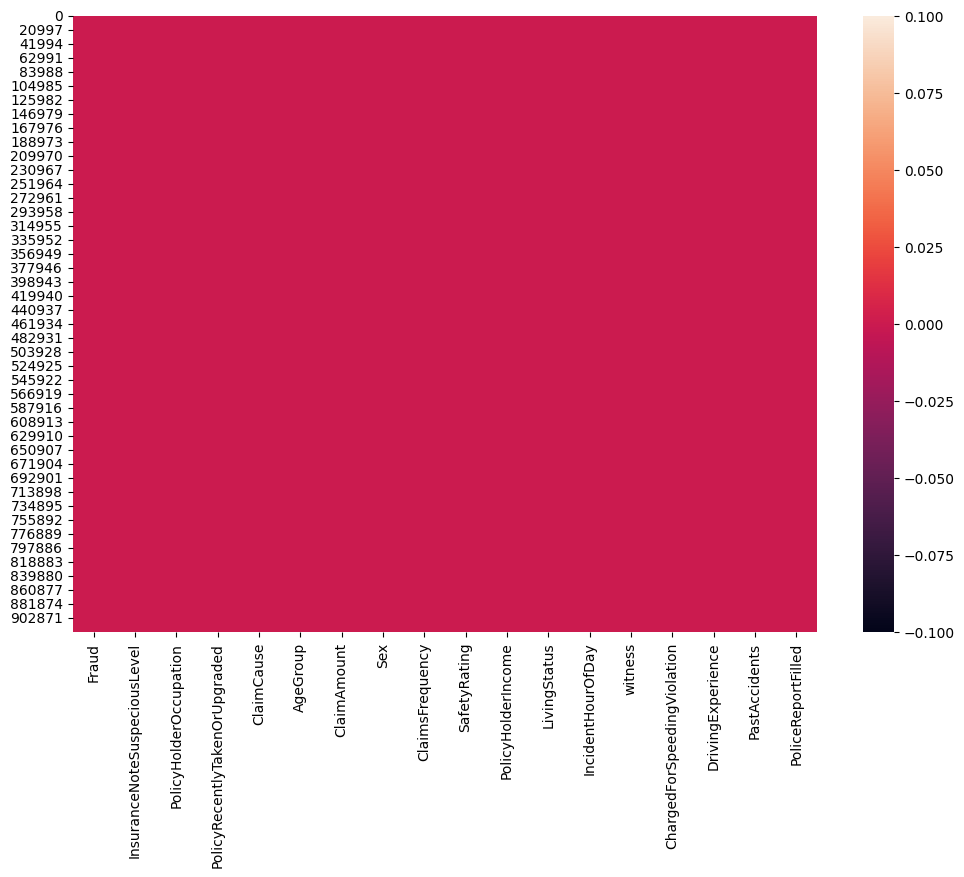

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [35]:
data[data.duplicated()].shape

(0, 18)

In [36]:
data.isnull().sum()

Fraud                            0
InsuranceNoteSuspeciousLevel     0
PolicyHolderOccupation           0
PolicyRecentlyTakenOrUpgraded    0
ClaimCause                       0
AgeGroup                         0
ClaimAmount                      0
Sex                              0
ClaimsFrequency                  0
SafetyRating                     0
PolicyHolderIncome               0
LivingStatus                     0
IncidentHourOfDay                0
witness                          0
ChargedForSpeedingViolation      0
DrivingExperience                0
PastAccidents                    0
PoliceReportFilled               0
dtype: int64

In [37]:
data.dtypes

Fraud                             object
InsuranceNoteSuspeciousLevel       int64
PolicyHolderOccupation            object
PolicyRecentlyTakenOrUpgraded     object
ClaimCause                        object
AgeGroup                          object
ClaimAmount                      float64
Sex                               object
ClaimsFrequency                    int64
SafetyRating                       int64
PolicyHolderIncome                 int64
LivingStatus                      object
IncidentHourOfDay                  int64
witness                            int64
ChargedForSpeedingViolation       object
DrivingExperience                 object
PastAccidents                      int64
PoliceReportFilled                object
dtype: object

In [38]:
data.head()

Fraud  InsuranceNoteSuspeciousLevel PolicyHolderOccupation  \
0    No                             3                 Doctor   
1    No                             4                Teacher   
2    No                             5            Electrician   
3    No                             5            Salesperson   
4   Yes                             4                 Doctor   

  PolicyRecentlyTakenOrUpgraded    ClaimCause AgeGroup  ClaimAmount     Sex  \
0                            No  Glass Damage    40-50      1229.68    Male   
1                           Yes     Accidents    50-60      9298.26  Female   
2                            No     Vandalism    30-40      2939.69    Male   
3                            No  Glass Damage    20-30      6783.45  Female   
4                            No     Accidents    30-40      6298.16    Male   

   ClaimsFrequency  SafetyRating  PolicyHolderIncome LivingStatus  \
0                0             2              352314      Married   
1                2             1              452377       Single   
2                1             0              821368       Single   
3                0             0              566697      Married   
4                2             1              858536       Single   

   IncidentHourOfDay  witness ChargedForSpeedingViolation DrivingExperience  \
0                  9        4                          No        5-10 years   
1                 17        0                          No         20+ years   
2                 24        3                         Yes        5-10 years   
3                  3        0                          No        5-10 years   
4                  9        2                         Yes        5-10 years   

   PastAccidents PoliceReportFilled  
0              0                 No  
1              1                 No  
2              2                 No  
3              4                 No  
4              4                 No

<Axes: ylabel='Fraud'>

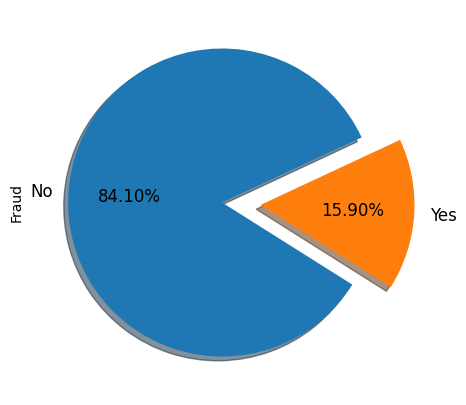

In [39]:
plt.figure(figsize=(5,5))
data.Fraud.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

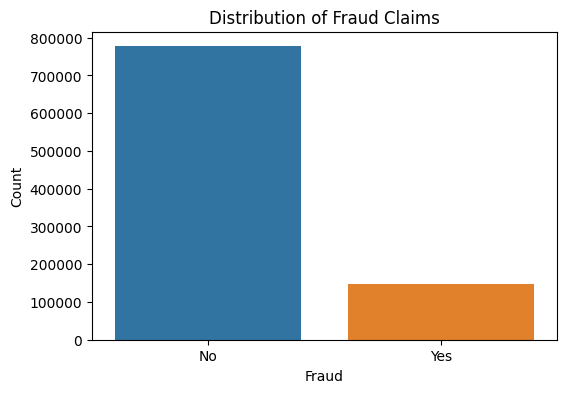

In [40]:
# Convert 'Fraud' column to categorical data type
a = data['Fraud'].astype('category')

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=a, data=data)

# Set plot labels and title
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraud Claims')

# Show the plot
plt.show()

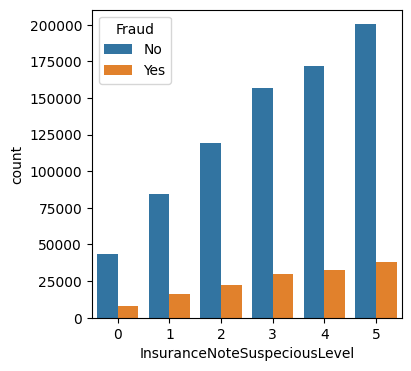

In [41]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['InsuranceNoteSuspeciousLevel'], hue=data['Fraud']);
plt.show()

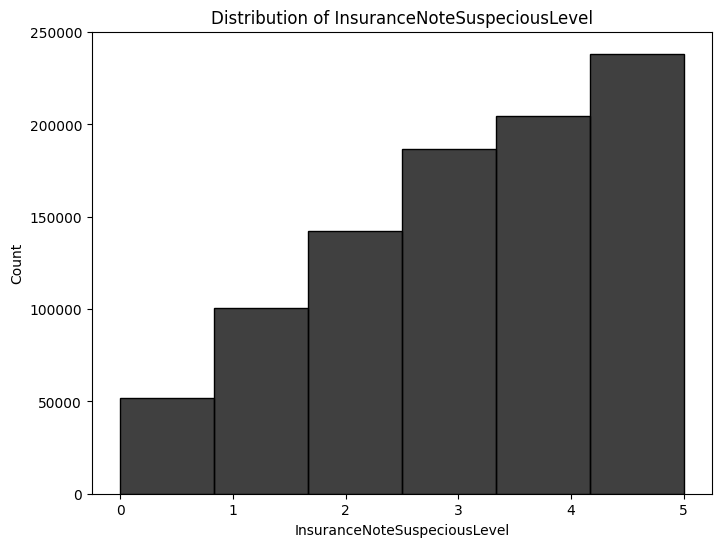

In [42]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['InsuranceNoteSuspeciousLevel'], bins=6, kde=False, color='black')

# Set plot labels and title
plt.xlabel('InsuranceNoteSuspeciousLevel')
plt.ylabel('Count')
plt.title('Distribution of InsuranceNoteSuspeciousLevel')

# Show the plot
plt.show()

<Axes: >

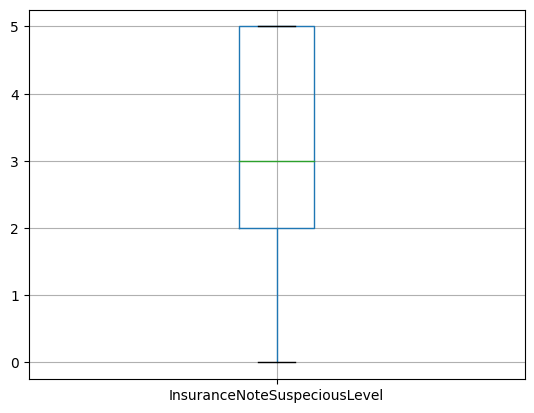

In [43]:
data.boxplot(column="InsuranceNoteSuspeciousLevel")

In [44]:
pd.crosstab(data['InsuranceNoteSuspeciousLevel'],data['Fraud'])

Fraud                             No    Yes
InsuranceNoteSuspeciousLevel               
0                              43538   8240
1                              84730  15938
2                             119615  22452
3                             156887  29727
4                             171936  32504
5                             200296  37993

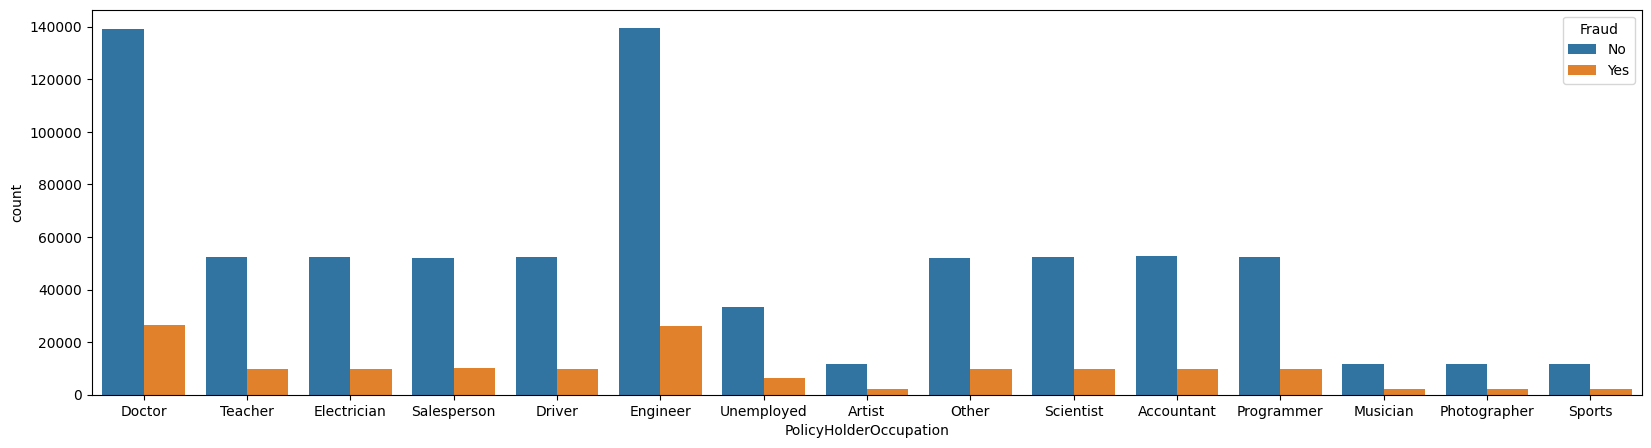

In [45]:
plt.figure(figsize=(20,5));
sns.countplot(x=data['PolicyHolderOccupation'], hue=data['Fraud']);
plt.show()

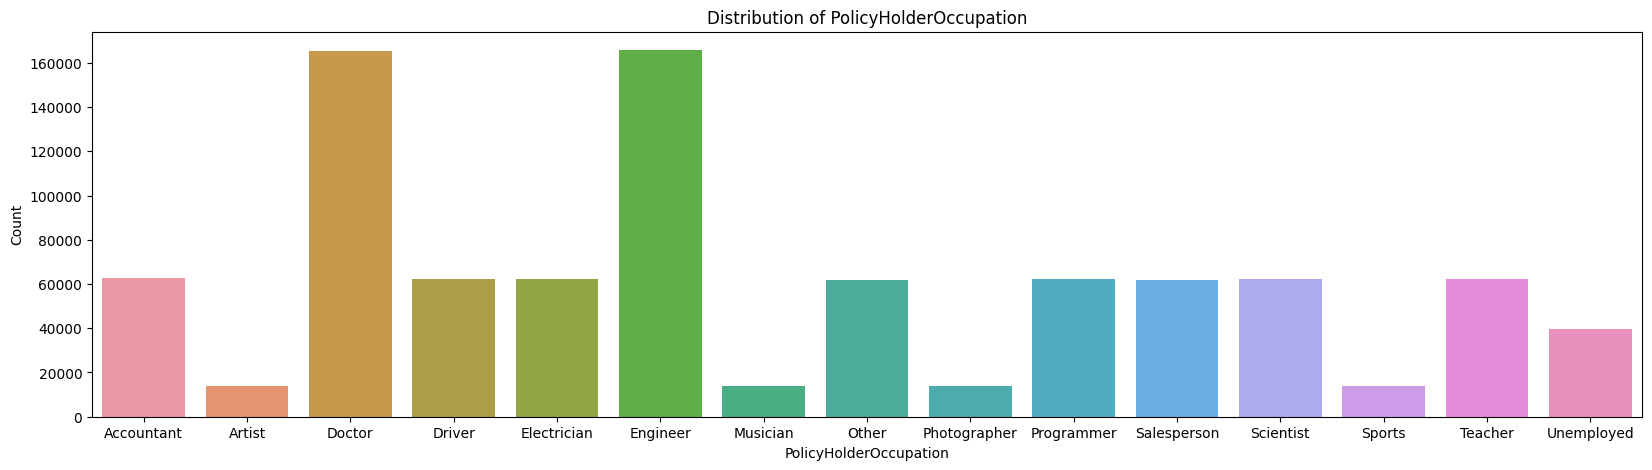

In [46]:
# Convert 'PolicyHolderOccupation' column to categorical data type
b = data['PolicyHolderOccupation'].astype('category')

# Create a countplot
plt.figure(figsize=(20, 5))
sns.countplot(x=b, data=data)

# Set plot labels and title
plt.xlabel('PolicyHolderOccupation')
plt.ylabel('Count')
plt.title('Distribution of PolicyHolderOccupation')

# Show the plot
plt.show()


In [47]:
pd.crosstab(data['PolicyHolderOccupation'],data['Fraud'])

Fraud                       No    Yes
PolicyHolderOccupation               
Accountant               52741   9854
Artist                   11641   2232
Doctor                  139004  26337
Driver                   52361   9948
Electrician              52332   9959
Engineer                139434  26312
Musician                 11695   2167
Other                    51846   9861
Photographer             11701   2156
Programmer               52554   9886
Salesperson              51962   9991
Scientist                52353   9820
Sports                   11662   2138
Teacher                  52369   9865
Unemployed               33347   6328

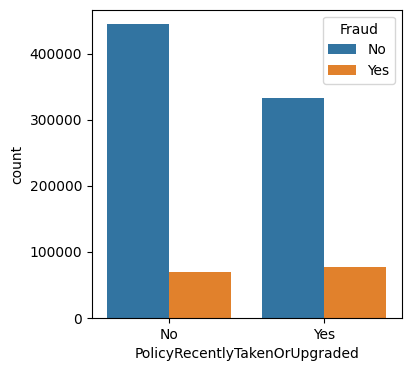

In [48]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['PolicyRecentlyTakenOrUpgraded'], hue=data['Fraud']);
plt.show()

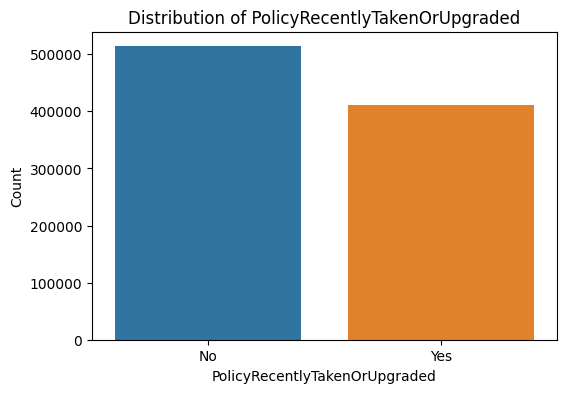

In [49]:
# Convert 'PolicyRecentlyTakenOrUpgraded' column to categorical data type
c = data['PolicyRecentlyTakenOrUpgraded'].astype('category')

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=c, data=data)

# Set plot labels and title
plt.xlabel('PolicyRecentlyTakenOrUpgraded')
plt.ylabel('Count')
plt.title('Distribution of PolicyRecentlyTakenOrUpgraded')

# Show the plot
plt.show()

In [50]:
pd.crosstab(data['PolicyRecentlyTakenOrUpgraded'],data['Fraud'])

Fraud                              No    Yes
PolicyRecentlyTakenOrUpgraded               
No                             444421  69250
Yes                            332581  77604

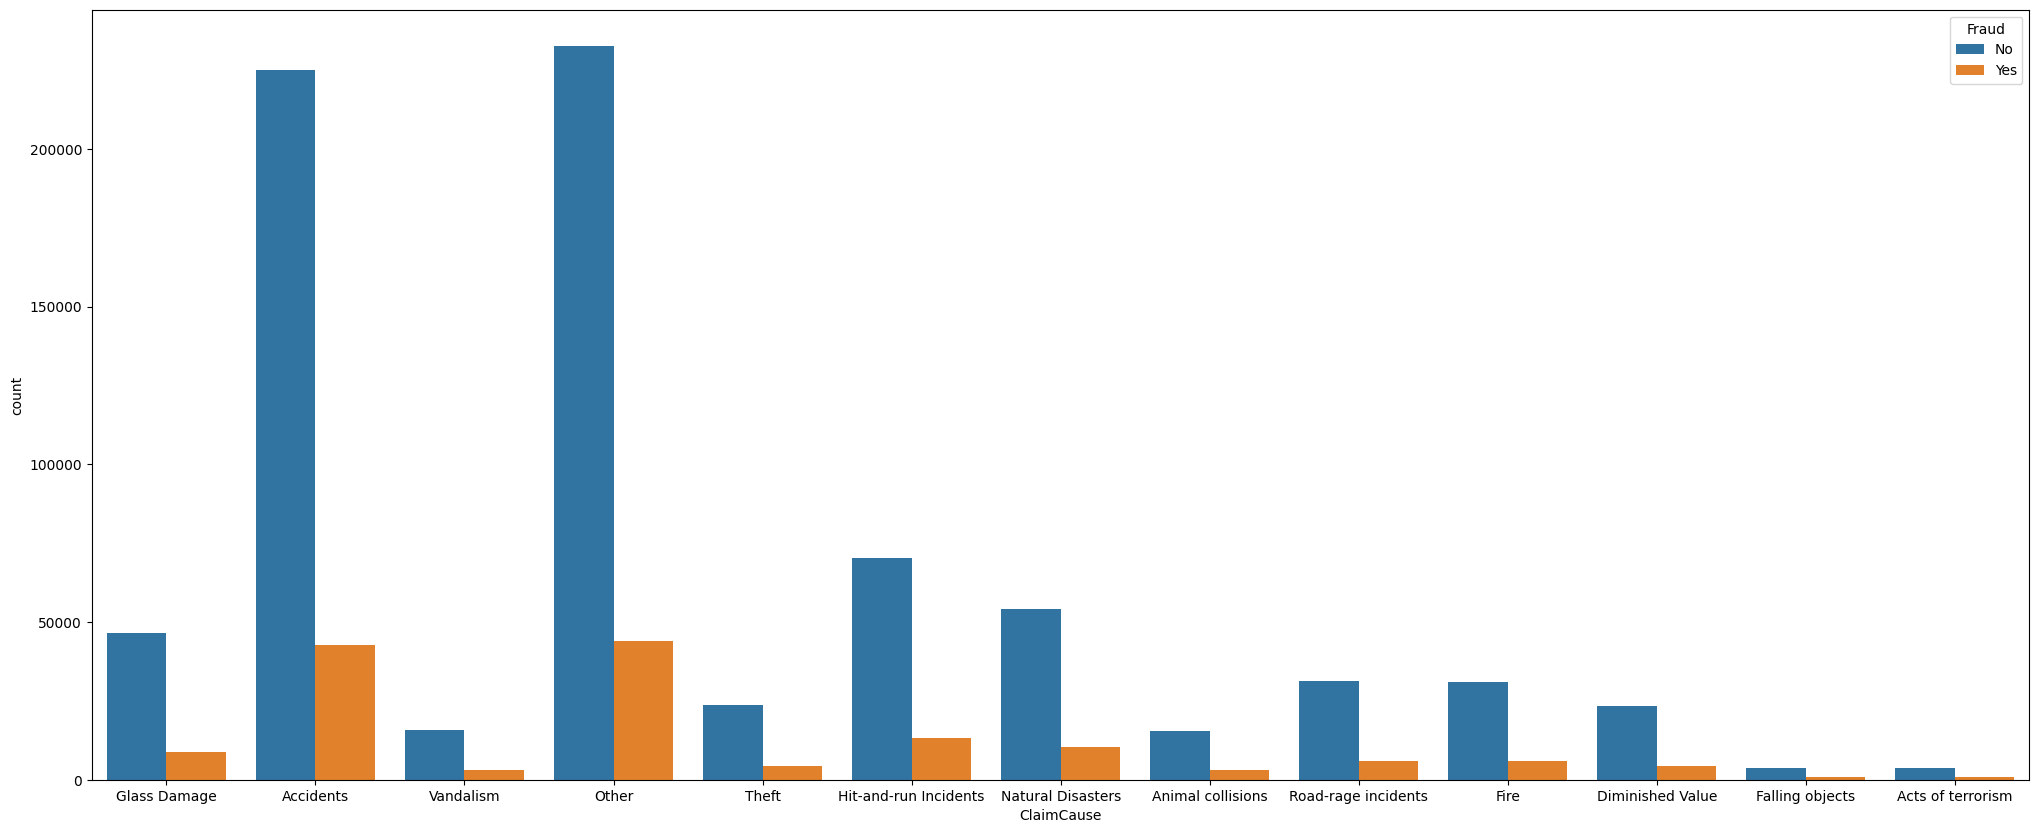

In [51]:
plt.figure(figsize=(25,10));
sns.countplot(x=data['ClaimCause'], hue=data['Fraud']);
plt.show()

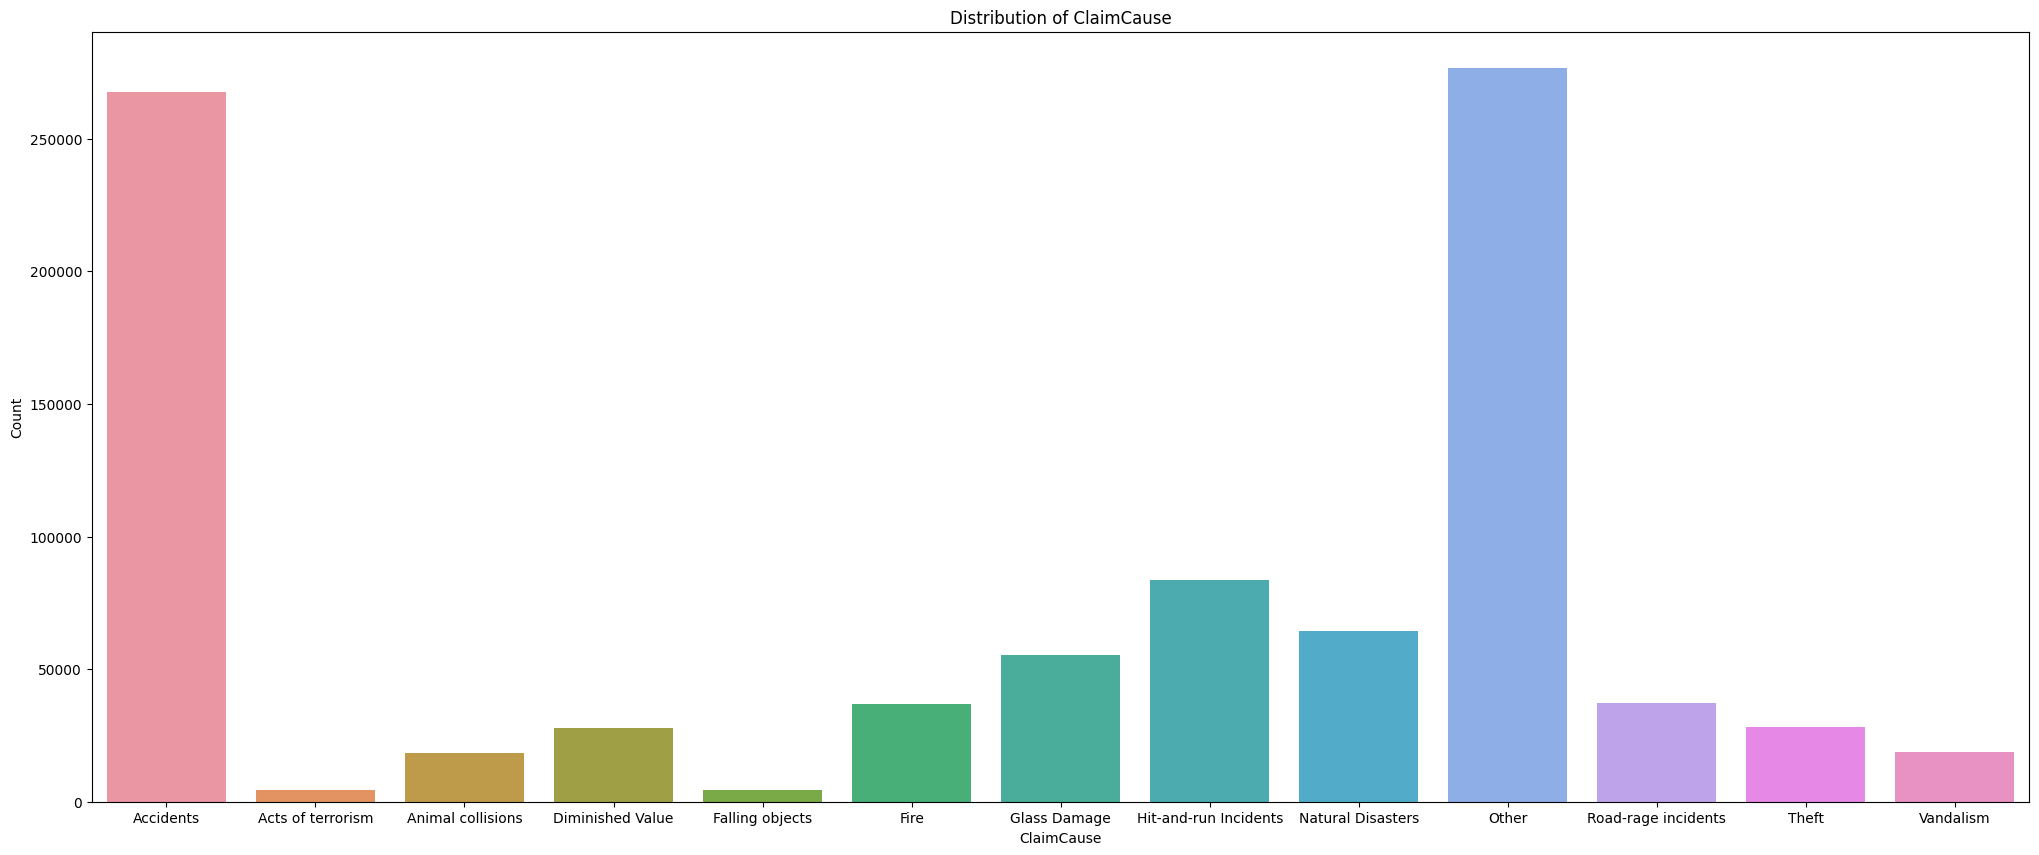

In [52]:
# Convert 'ClaimCause' column to categorical data type
d = data['ClaimCause'].astype('category')

# Create a countplot
plt.figure(figsize=(25, 10))
sns.countplot(x=d, data=data)

# Set plot labels and title
plt.xlabel('ClaimCause')
plt.ylabel('Count')
plt.title('Distribution of ClaimCause')

# Show the plot
plt.show()

In [53]:
pd.crosstab(data['ClaimCause'],data['Fraud'])

Fraud                      No    Yes
ClaimCause                          
Accidents              225006  42779
Acts of terrorism        3828    742
Animal collisions       15461   2935
Diminished Value        23278   4443
Falling objects          3830    746
Fire                    31116   5873
Glass Damage            46458   8784
Hit-and-run Incidents   70394  13133
Natural Disasters       54230  10279
Other                  232534  43977
Road-rage incidents     31410   5860
Theft                   23696   4361
Vandalism               15761   2942

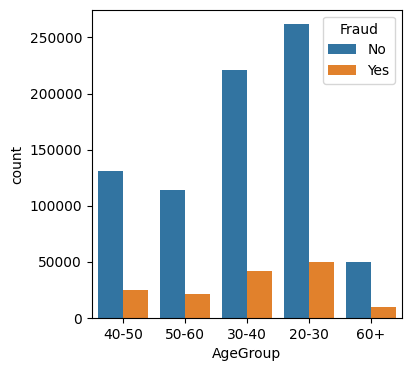

In [54]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['AgeGroup'], hue=data['Fraud']);
plt.show()

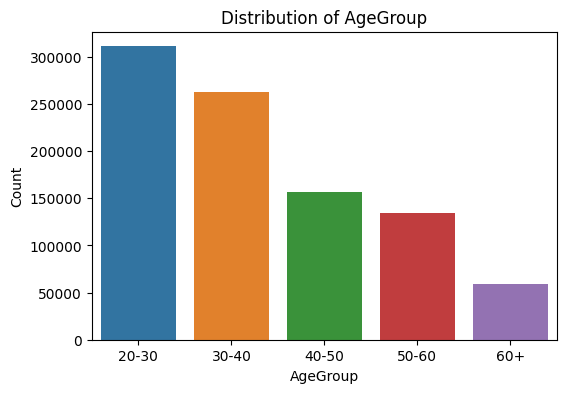

In [55]:
# Convert 'AgeGroup' column to categorical data type
e = data['AgeGroup'].astype('category')

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=e, data=data)

# Set plot labels and title
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.title('Distribution of AgeGroup')

# Show the plot
plt.show()

In [56]:
pd.crosstab(data['AgeGroup'],data['Fraud'])

Fraud         No    Yes
AgeGroup               
20-30     261655  49416
30-40     221179  41698
40-50     131295  25104
50-60     113579  21315
60+        49294   9321

In [57]:
data.groupby('Fraud').agg({'ClaimAmount':['min','max','mean']})

ClaimAmount                      
              min      max         mean
Fraud                                  
No          10.01  9998.98  5144.933759
Yes         10.70  9998.94  6997.757169

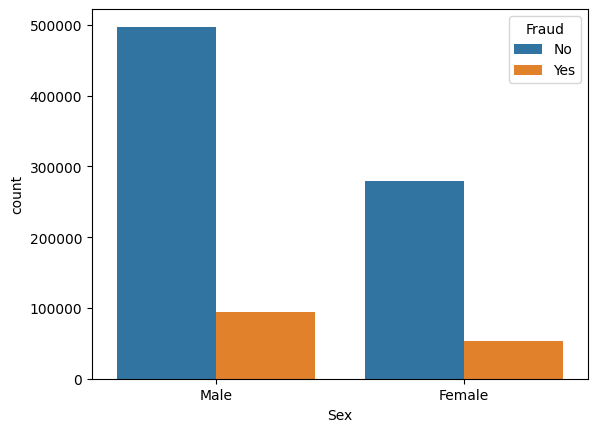

In [58]:
sns.countplot(x="Sex", hue='Fraud', data=data);

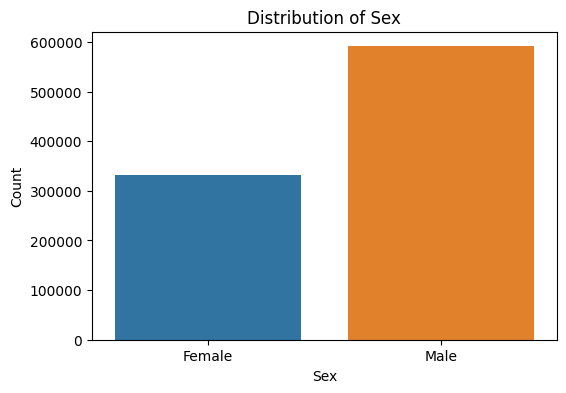

In [59]:
# Convert 'Sex' column to categorical data type
f = data['Sex'].astype('category')

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=f, data=data)

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

# Show the plot
plt.show()

In [60]:
pd.crosstab(data['Sex'], data['Fraud'])

Fraud       No    Yes
Sex                  
Female  279683  53082
Male    497319  93772

In [61]:
from scipy.stats import chi2_contingency as chi
obs_val = pd.crosstab(data['Sex'], data['Fraud'], normalize='index')
chi(obs_val)

#store the results into diff variables:
c,p,dof,exp_val = chi(obs_val)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a difference between Male & Female')
else:
    print('Do not reject the Null hypothesis')
    print('There is no difference between Male & Female')

Do not reject the Null hypothesis
There is no difference between Male & Female


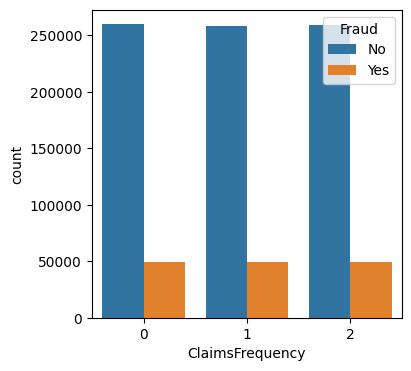

In [62]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['ClaimsFrequency'], hue=data['Fraud']);
plt.show()

<Axes: >

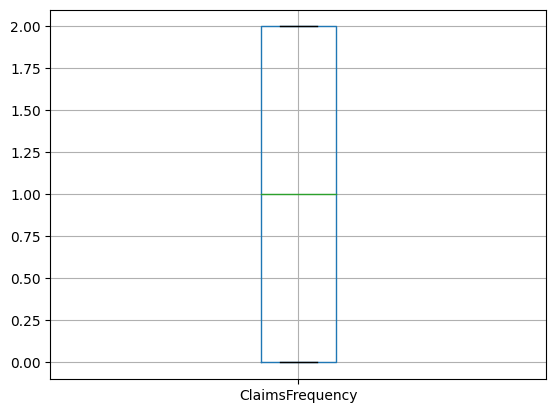

In [63]:
data.boxplot(column="ClaimsFrequency")

In [64]:
pd.crosstab(data['ClaimsFrequency'], data['Fraud'])

Fraud                No    Yes
ClaimsFrequency               
0                259650  48991
1                258201  48901
2                259151  48962

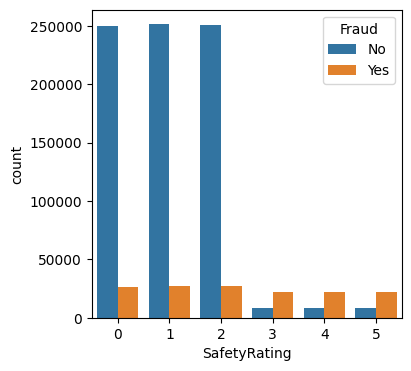

In [65]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['SafetyRating'], hue=data['Fraud']);
plt.show()

<Axes: >

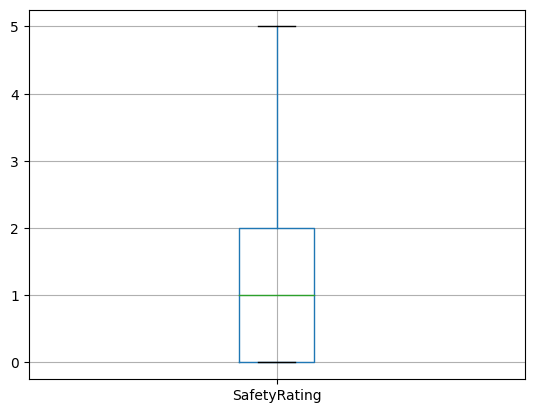

In [66]:
data.boxplot(column="SafetyRating")

In [67]:
pd.crosstab(data['SafetyRating'], data['Fraud'])

Fraud             No    Yes
SafetyRating               
0             249727  26554
1             251155  27233
2             250431  26957
3               8619  22077
4               8645  22047
5               8425  21986

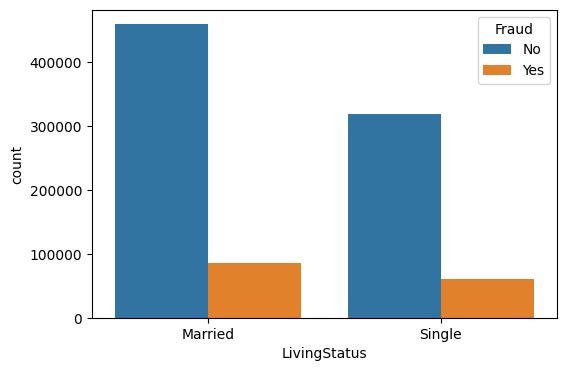

In [68]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['LivingStatus'], hue=data['Fraud'])
plt.show();

In [69]:
pd.crosstab(data['LivingStatus'], data['Fraud'])

Fraud             No    Yes
LivingStatus               
Married       458709  86279
Single        318293  60575

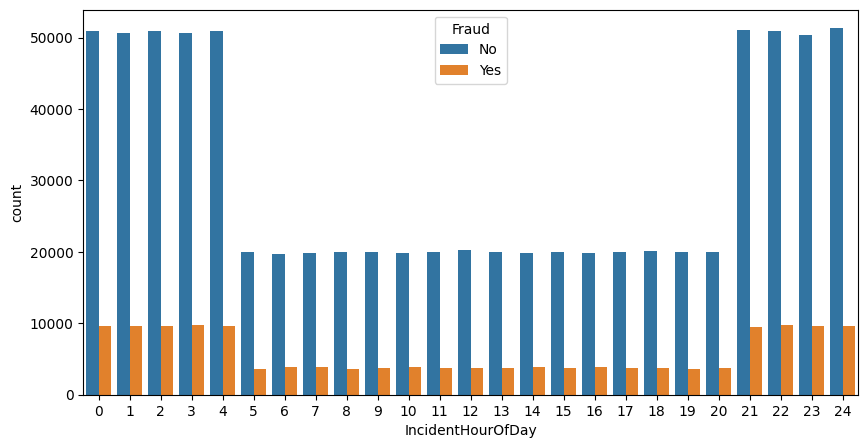

In [70]:
plt.figure(figsize=(10,5));
sns.countplot(x=data['IncidentHourOfDay'], hue=data['Fraud'])
plt.show();

<Axes: >

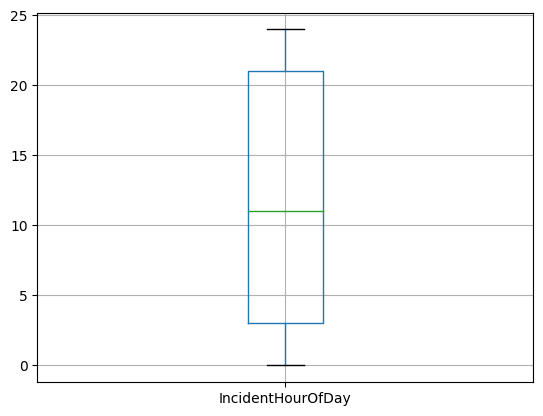

In [71]:
data.boxplot(column="IncidentHourOfDay")

In [72]:
pd.crosstab(data['IncidentHourOfDay'], data['Fraud'])

Fraud                 No   Yes
IncidentHourOfDay             
0                  50876  9642
1                  50678  9675
2                  50896  9666
3                  50670  9734
4                  50855  9602
5                  20000  3645
6                  19669  3833
7                  19798  3852
8                  20010  3647
9                  20034  3758
10                 19896  3865
11                 19916  3736
12                 20280  3730
13                 20024  3721
14                 19852  3824
15                 19978  3761
16                 19819  3826
17                 20041  3713
18                 20121  3755
19                 19934  3618
20                 19997  3771
21                 51020  9479
22                 50931  9732
23                 50371  9620
24                 51336  9649

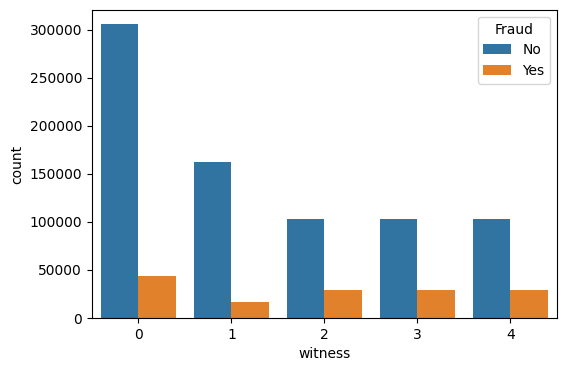

In [73]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['witness'], hue=data['Fraud'])
plt.show();

<Axes: >

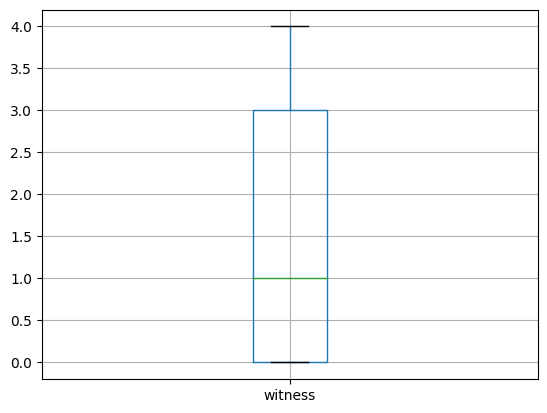

In [74]:
data.boxplot(column="witness")

In [75]:
pd.crosstab(data['witness'], data['Fraud'])

Fraud        No    Yes
witness               
0        305538  43689
1        162716  16339
2        102710  28734
3        102841  29040
4        103197  29052

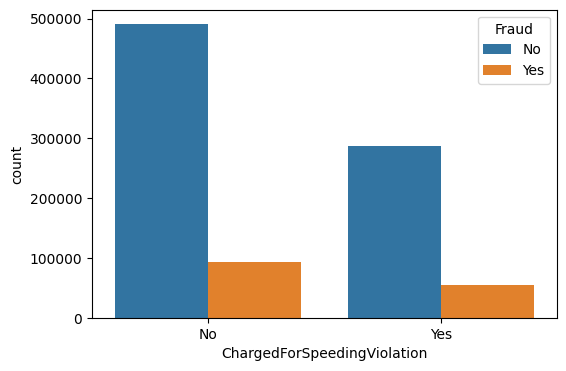

In [76]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['ChargedForSpeedingViolation'], hue=data['Fraud'])
plt.show();

In [77]:
pd.crosstab(data['ChargedForSpeedingViolation'], data['Fraud'])

Fraud                            No    Yes
ChargedForSpeedingViolation               
No                           490361  92489
Yes                          286641  54365

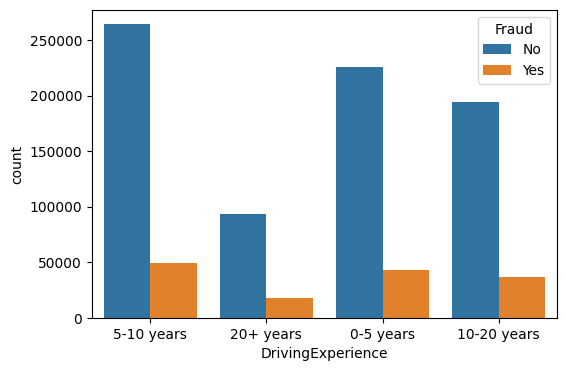

In [78]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['DrivingExperience'], hue=data['Fraud'])
plt.show();

In [79]:
pd.crosstab(data['DrivingExperience'], data['Fraud'])

Fraud                  No    Yes
DrivingExperience               
0-5 years          225682  43031
10-20 years        194093  36498
20+ years           93148  17618
5-10 years         264079  49707

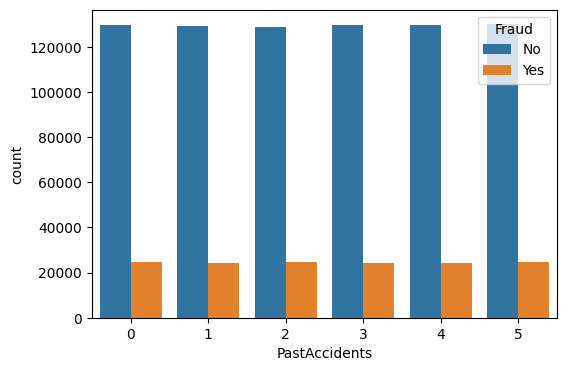

In [80]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['PastAccidents'], hue=data['Fraud'])
plt.show();

<Axes: >

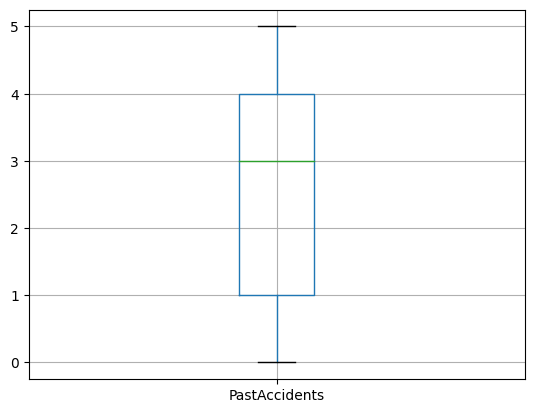

In [81]:
data.boxplot(column="PastAccidents")

In [82]:
pd.crosstab(data['PastAccidents'], data['Fraud'])

Fraud              No    Yes
PastAccidents               
0              129512  24515
1              129361  24399
2              128932  24736
3              129528  24181
4              129692  24468
5              129977  24555

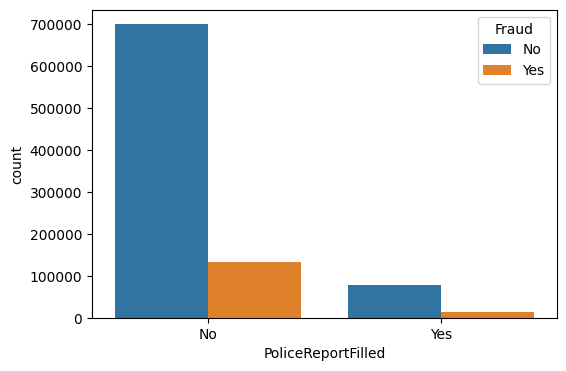

In [83]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['PoliceReportFilled'], hue=data['Fraud'])
plt.show();

In [84]:
pd.crosstab(data['PoliceReportFilled'], data['Fraud'])

Fraud                   No     Yes
PoliceReportFilled                
No                  699267  132120
Yes                  77735   14734

In [85]:
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

In [86]:
data[numerical_columns]

InsuranceNoteSuspeciousLevel  ClaimAmount  ClaimsFrequency  \
0                                  3      1229.68                0   
1                                  4      9298.26                2   
2                                  5      2939.69                1   
3                                  5      6783.45                0   
4                                  4      6298.16                2   
...                              ...          ...              ...   
923851                             0      3945.80                0   
923852                             3      6436.06                1   
923853                             4      1906.04                1   
923854                             5      6882.08                1   
923855                             3      9040.09                0   

        SafetyRating  PolicyHolderIncome  IncidentHourOfDay  witness  \
0                  2              352314                  9        4   
1                  1              452377                 17        0   
2                  0              821368                 24        3   
3                  0              566697                  3        0   
4                  1              858536                  9        2   
...              ...                 ...                ...      ...   
923851             1              264909                 22        2   
923852             1              163404                  3        0   
923853             2              422508                 16        0   
923854             0              203412                  1        2   
923855             0              349522                 20        0   

        PastAccidents  
0                   0  
1                   1  
2                   2  
3                   4  
4                   4  
...               ...  
923851              1  
923852              1  
923853              5  
923854              0  
923855              3  

[923856 rows x 8 columns]

In [87]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'O']

In [88]:
data[categorical_columns]

Fraud PolicyHolderOccupation PolicyRecentlyTakenOrUpgraded  \
0         No                 Doctor                            No   
1         No                Teacher                           Yes   
2         No            Electrician                            No   
3         No            Salesperson                            No   
4        Yes                 Doctor                            No   
...      ...                    ...                           ...   
923851    No               Engineer                            No   
923852    No               Engineer                           Yes   
923853    No               Engineer                            No   
923854    No               Musician                            No   
923855    No            Electrician                           Yes   

               ClaimCause AgeGroup     Sex LivingStatus  \
0            Glass Damage    40-50    Male      Married   
1               Accidents    50-60  Female       Single   
2               Vandalism    30-40    Male       Single   
3            Glass Damage    20-30  Female      Married   
4               Accidents    30-40    Male       Single   
...                   ...      ...     ...          ...   
923851  Acts of terrorism    50-60    Male       Single   
923852  Natural Disasters    20-30    Male      Married   
923853              Other    20-30    Male       Single   
923854          Vandalism    50-60  Female       Single   
923855       Glass Damage    30-40  Female      Married   

       ChargedForSpeedingViolation DrivingExperience PoliceReportFilled  
0                               No        5-10 years                 No  
1                               No         20+ years                 No  
2                              Yes        5-10 years                 No  
3                               No        5-10 years                 No  
4                              Yes        5-10 years                 No  
...                            ...               ...                ...  
923851                         Yes        5-10 years                 No  
923852                          No         20+ years                 No  
923853                         Yes        5-10 years                 No  
923854                         Yes        5-10 years                 No  
923855                         Yes         0-5 years                 No  

[923856 rows x 10 columns]

In [89]:
print(f'Number of Categorical features: {len(categorical_columns)}')
print(f'Number of numerical features: {len(numerical_columns)}')

Number of Categorical features: 10
Number of numerical features: 8


In [90]:
for outliers_column in numerical_columns:
    print("Column:", outliers_column)
    print("Data type:", data[outliers_column].dtype)
    print("Sample values:", data[outliers_column].sample(10))
    print("\n")

Column: InsuranceNoteSuspeciousLevel
Data type: int64
Sample values: 229160    1
820199    3
138748    4
479646    5
346196    1
144650    2
651688    4
427054    0
120241    5
649192    4
Name: InsuranceNoteSuspeciousLevel, dtype: int64


Column: ClaimAmount
Data type: float64
Sample values: 549486    7924.61
431373    7942.62
119574    5291.64
881268    1446.45
782623    1966.41
743180    3532.34
280807    8798.06
398133    6914.04
5560      5864.58
892036     909.49
Name: ClaimAmount, dtype: float64


Column: ClaimsFrequency
Data type: int64
Sample values: 754246    2
695800    2
449281    0
592587    1
415266    0
811451    1
280318    0
103440    1
872086    2
782874    1
Name: ClaimsFrequency, dtype: int64


Column: SafetyRating
Data type: int64
Sample values: 721383    0
92530     1
203232    4
448340    0
462338    4
831104    5
358982    0
665406    5
255052    2
922307    2
Name: SafetyRating, dtype: int64


Column: PolicyHolderIncome
Data type: int64
Sample values: 788459   

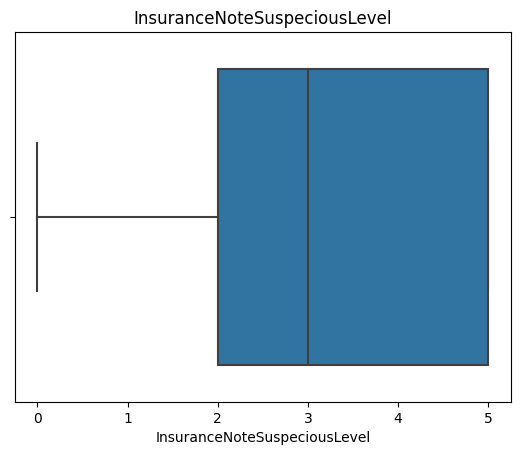

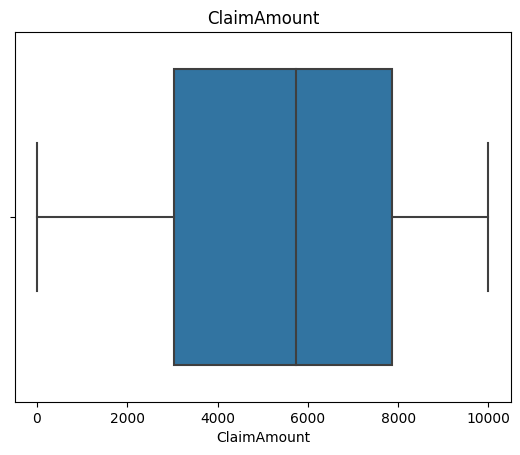

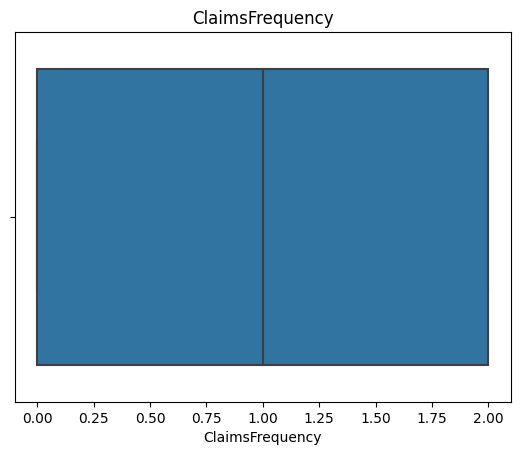

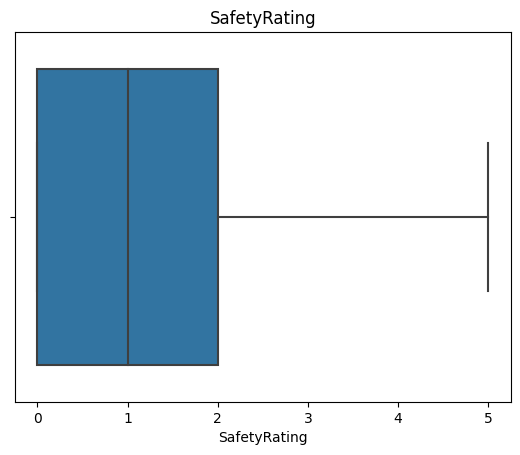

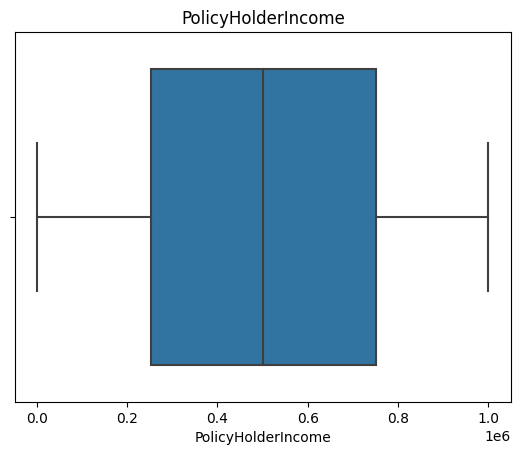

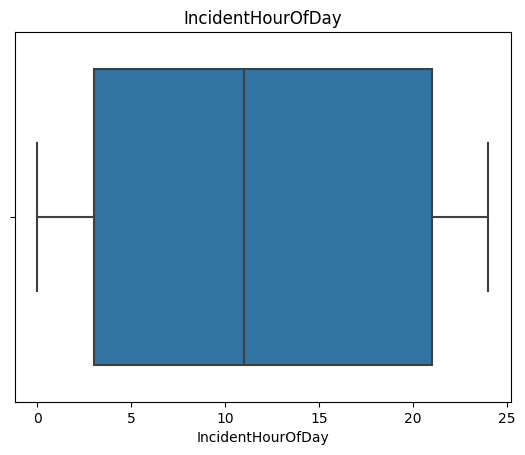

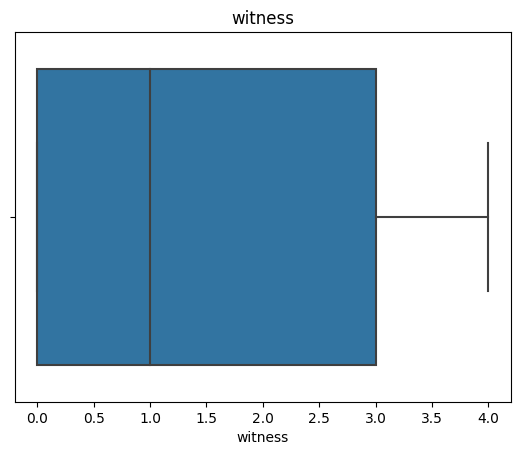

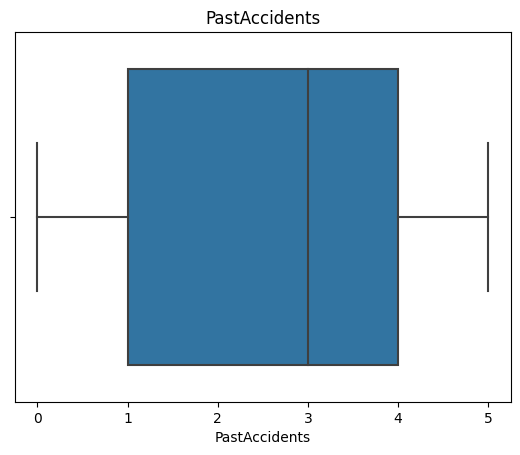

In [91]:
for outliers_column in numerical_columns:
    plt.title(outliers_column)
    sns.boxplot(x=data[outliers_column])
    plt.show()

([<matplotlib.patches.Wedge at 0x7c873d163850>,
 [Text(-0.1910130855889933, 1.083288512416601, 'Categorical'),
  Text(0.19101318701378264, -1.0832884945326604, 'Continuous')],
 [Text(-0.10418895577581451, 0.5908846431363277, '55.55555820%'),
  Text(0.10418901109842689, -0.5908846333814511, '44.44444478%')])

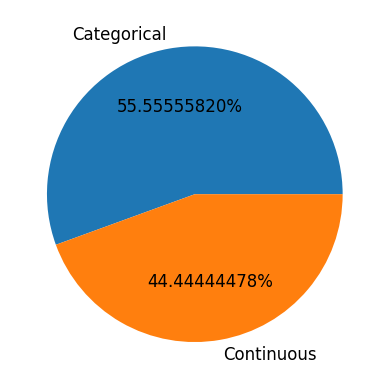

In [92]:
plt.pie([len(categorical_columns),len(numerical_columns)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%0.8f%%')

<ipython-input-93-b719efa1be80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ClaimAmount'])


<Axes: xlabel='ClaimAmount', ylabel='Density'>

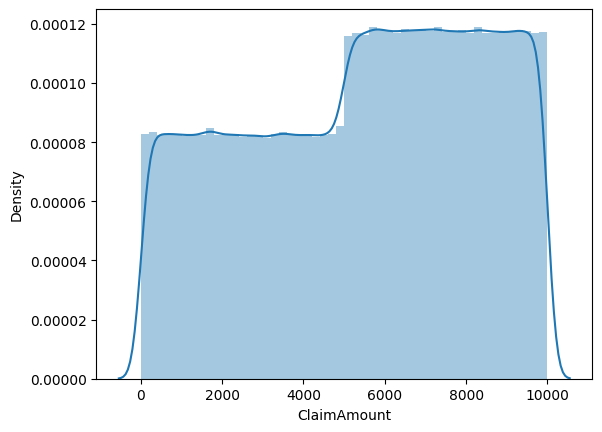

In [93]:
sns.distplot(data['ClaimAmount'])

<ipython-input-94-f3548b5bb289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PolicyHolderIncome'])


<Axes: xlabel='PolicyHolderIncome', ylabel='Density'>

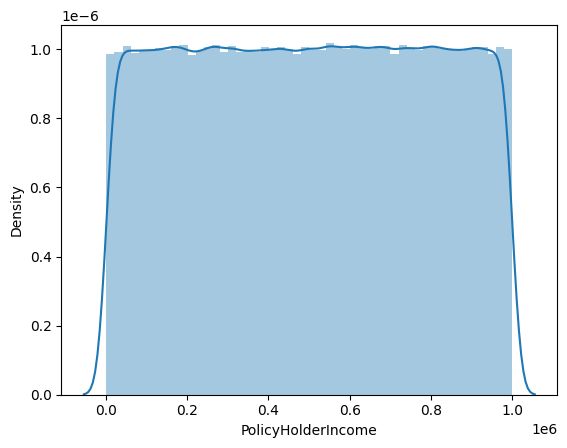

In [94]:
sns.distplot(data['PolicyHolderIncome'])

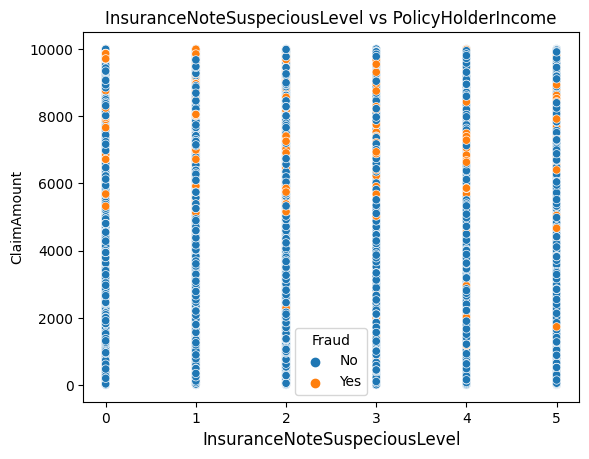

In [95]:
sns.scatterplot(x='InsuranceNoteSuspeciousLevel', y='ClaimAmount', hue='Fraud', data=data)
plt.title('InsuranceNoteSuspeciousLevel vs PolicyHolderIncome')
plt.xlabel('InsuranceNoteSuspeciousLevel', fontsize=12)
plt.show()

In [96]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

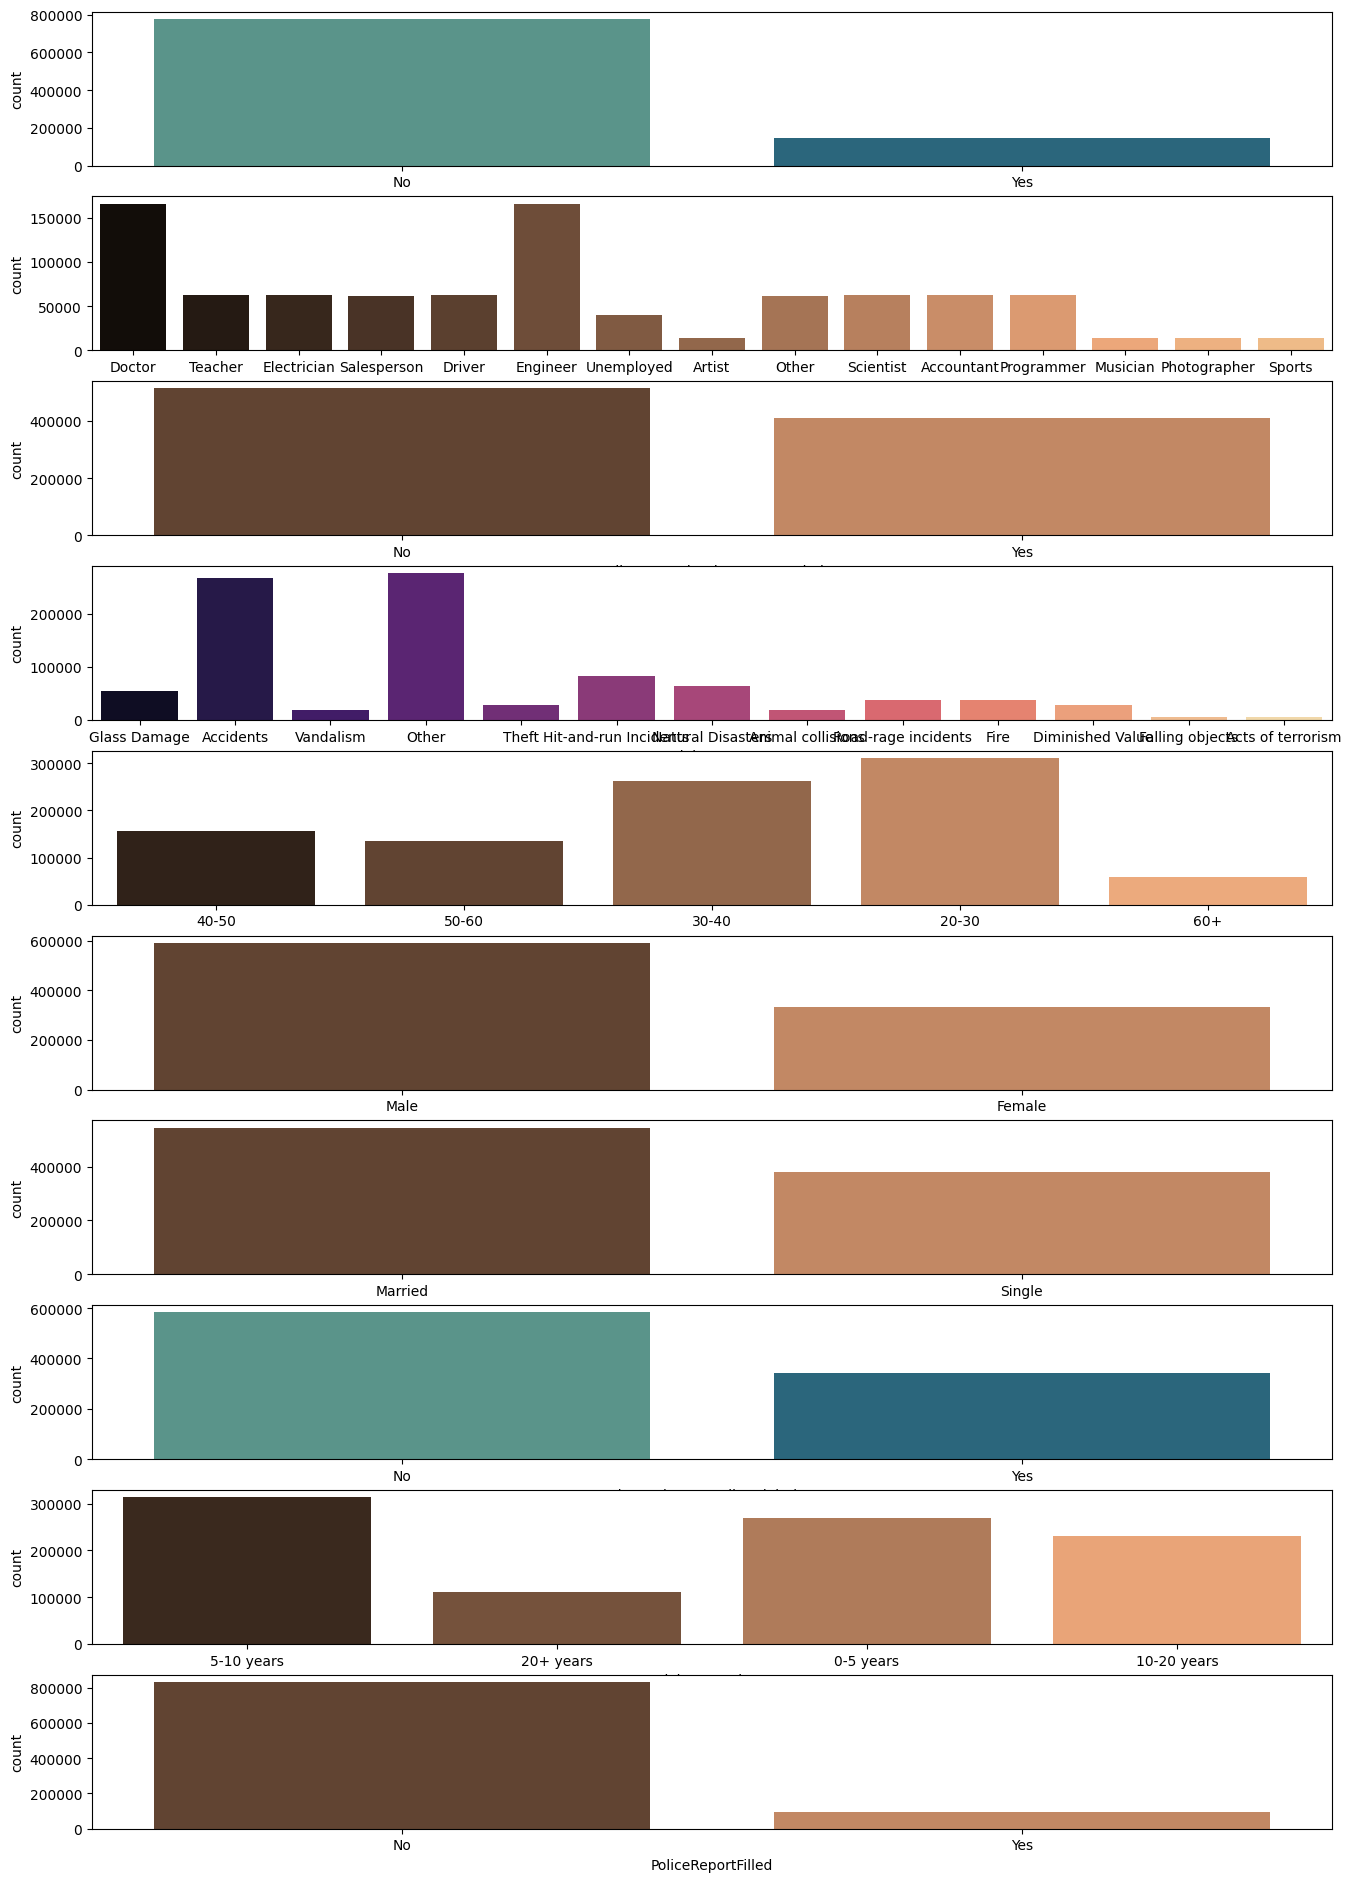

In [97]:
plt.figure(figsize=(16,50))
for i,col in enumerate(data[categorical_columns].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)

    sns.countplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

<ipython-input-98-93fe57087457>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
<ipython-input-98-93fe57087457>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
<ipython-input-98-93fe57087457>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
<ipython-input-98-93fe57087457>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
<ipython-input-98-93fe57087457>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data,

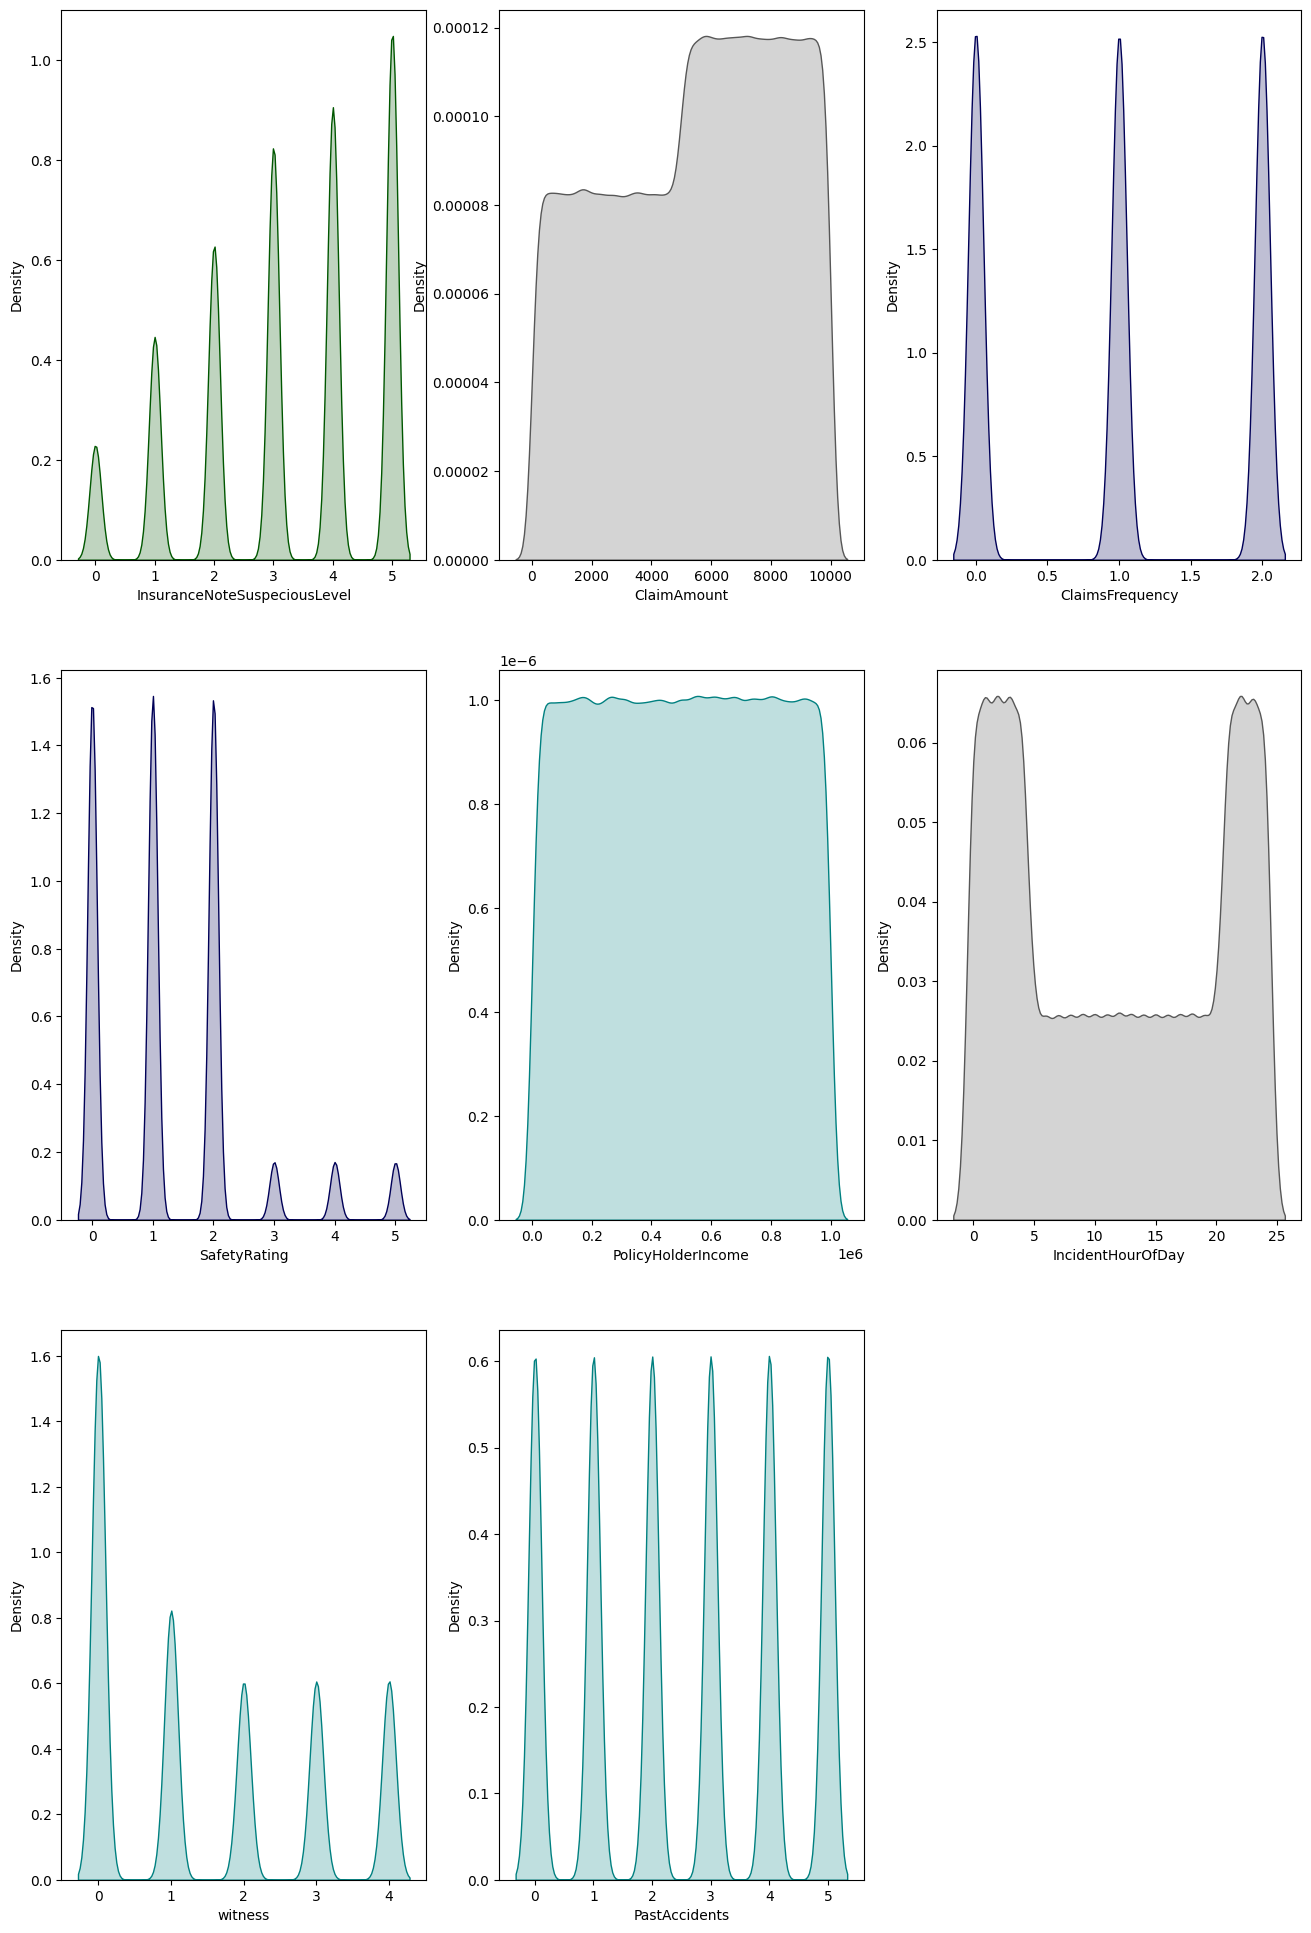

In [98]:
plt.figure(figsize=(16,50))
for i,col in enumerate(data[numerical_columns].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)

    sns.kdeplot(data=data,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

<ipython-input-99-7f3024931e3f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='InsuranceNoteSuspeciousLevel',stat="probability",palette = 'hls',data = data)


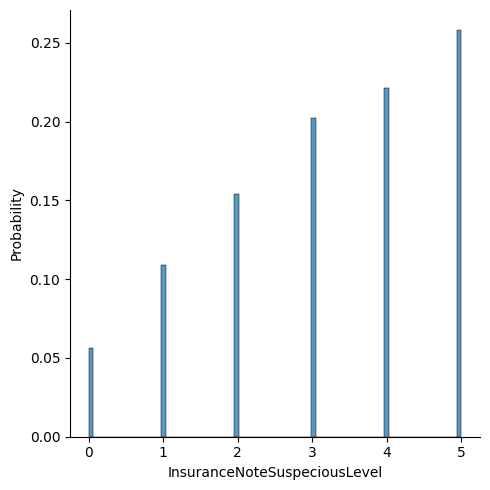

In [99]:
sns.displot(x ='InsuranceNoteSuspeciousLevel',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-100-3e24dde515cc>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='PolicyHolderOccupation',stat="probability",palette = 'hls',data = data)


<Figure size 3000x500 with 0 Axes>

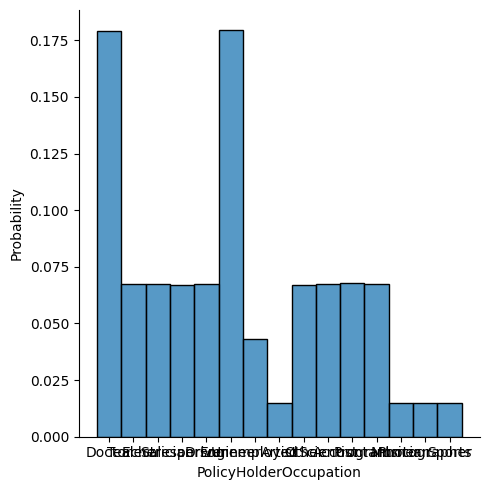

In [100]:
plt.figure(figsize=(30, 5))
sns.displot(x ='PolicyHolderOccupation',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-101-66de56fe7241>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='PolicyRecentlyTakenOrUpgraded',stat="probability",palette = 'hls',data = data)


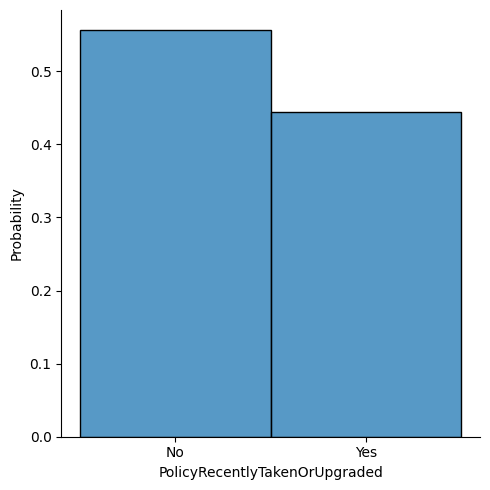

In [101]:
sns.displot(x ='PolicyRecentlyTakenOrUpgraded',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-102-b1d2cc24931e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='ClaimCause',stat="probability",palette = 'hls',data = data)


<Figure size 3000x500 with 0 Axes>

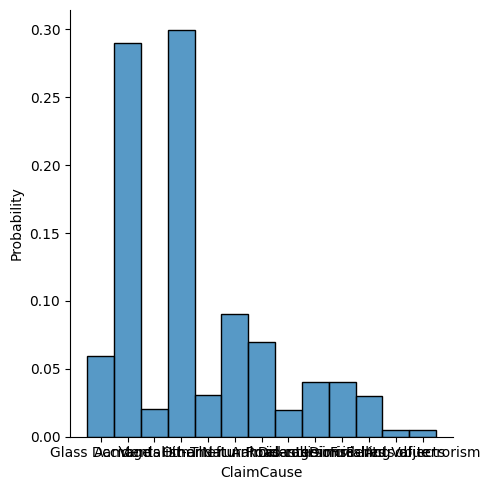

In [102]:
plt.figure(figsize=(30, 5))
sns.displot(x ='ClaimCause',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-103-7181ec182646>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='AgeGroup',stat="probability",palette = 'hls',data = data)


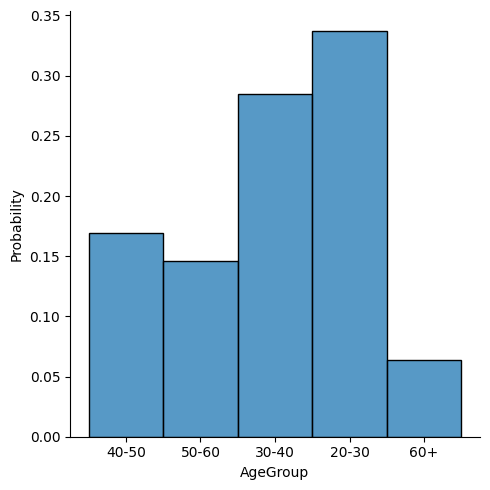

In [103]:
sns.displot(x ='AgeGroup',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-104-826fc74f61d7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='ClaimAmount',stat="probability",palette = 'hls',data = data)


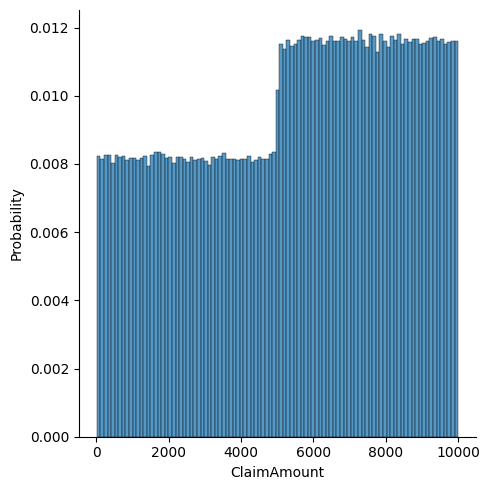

In [104]:
sns.displot(x ='ClaimAmount',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-105-0918d67a2bf7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='Sex',stat="probability",palette = 'hls',data = data)


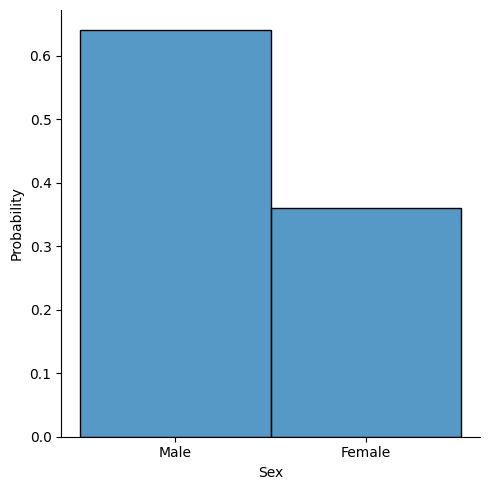

In [105]:
sns.displot(x ='Sex',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-106-7e0348c9b544>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='SafetyRating',stat="probability",palette = 'hls',data = data)


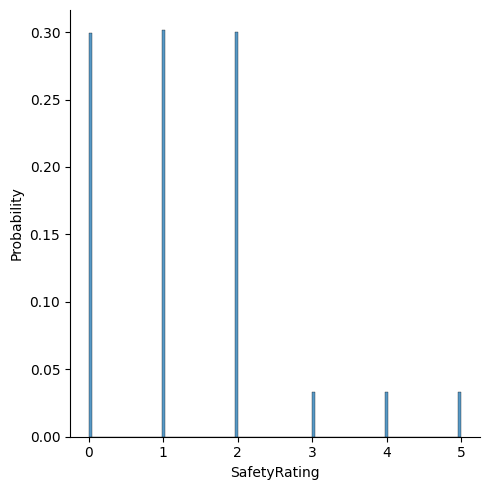

In [106]:
sns.displot(x ='SafetyRating',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-107-e155a33dcb60>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='PolicyHolderIncome',stat="probability",palette = 'hls',data = data)


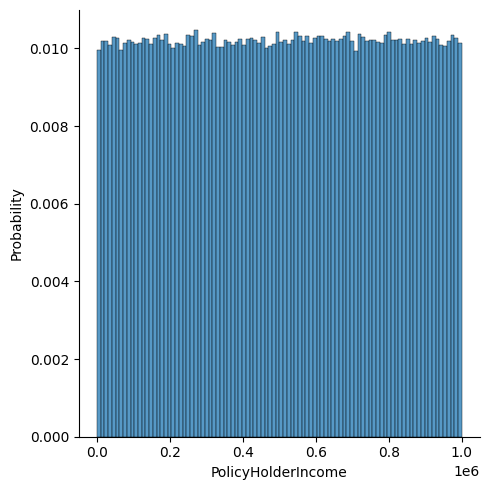

In [107]:
sns.displot(x ='PolicyHolderIncome',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-108-934fba19cb95>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='LivingStatus',stat="probability",palette = 'hls',data = data)


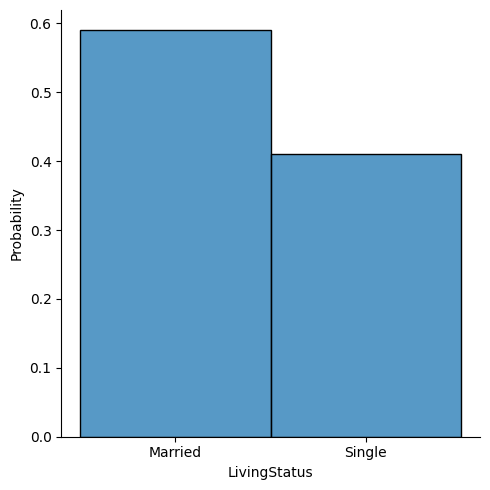

In [108]:
sns.displot(x ='LivingStatus',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-109-3b9dfda2df70>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='IncidentHourOfDay',stat="probability",palette = 'hls',data = data)


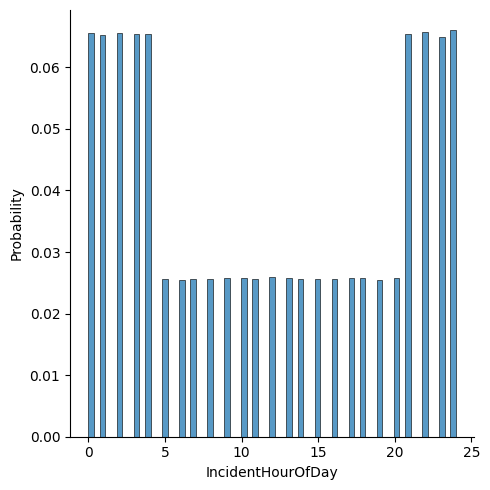

In [109]:
sns.displot(x ='IncidentHourOfDay',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-110-8e0fa9189bc1>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='witness',stat="probability",palette = 'hls',data = data)


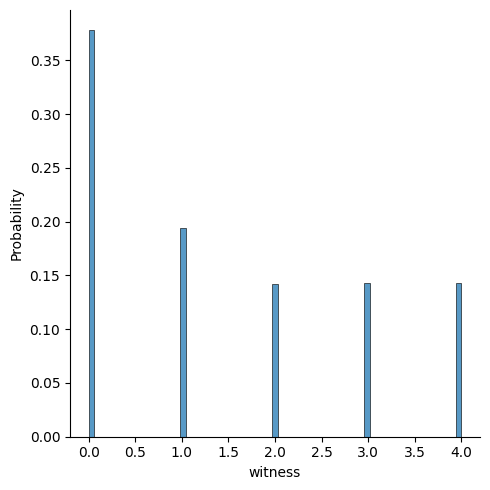

In [110]:
sns.displot(x ='witness',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-111-2d488cc72dbb>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='ChargedForSpeedingViolation',stat="probability",palette = 'hls',data = data)


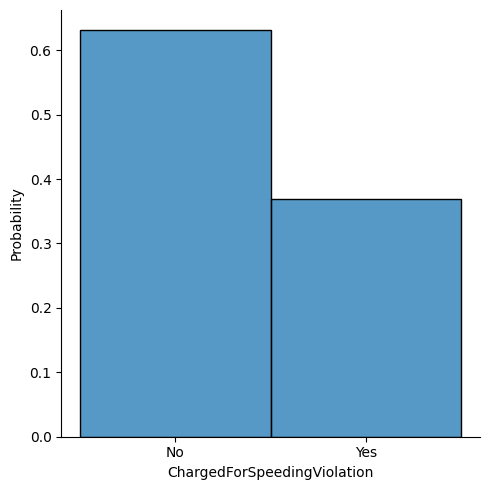

In [111]:
sns.displot(x ='ChargedForSpeedingViolation',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-112-2a8087ccf134>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='DrivingExperience',stat="probability",palette = 'hls',data = data)


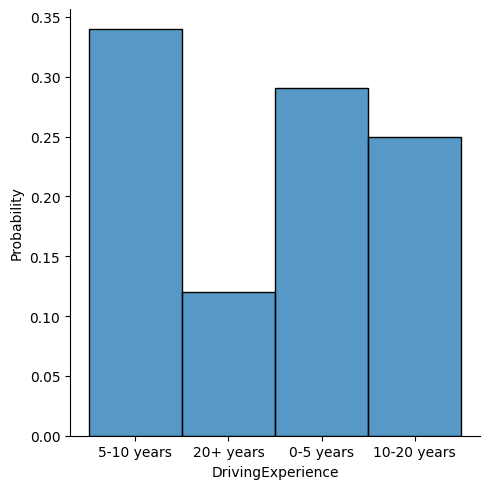

In [112]:
sns.displot(x ='DrivingExperience',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

<ipython-input-113-55fccacb7f48>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='PoliceReportFilled',stat="probability",palette = 'hls',data = data)


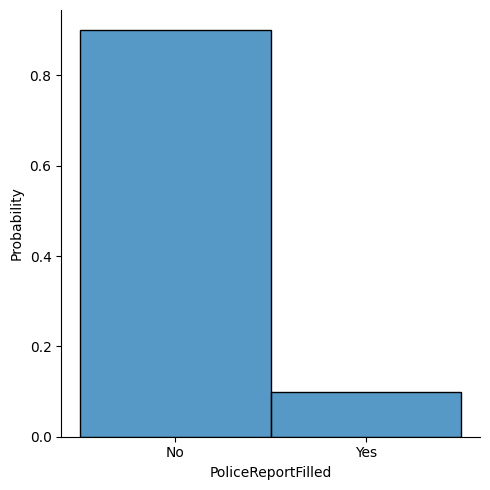

In [113]:
sns.displot(x ='PoliceReportFilled',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

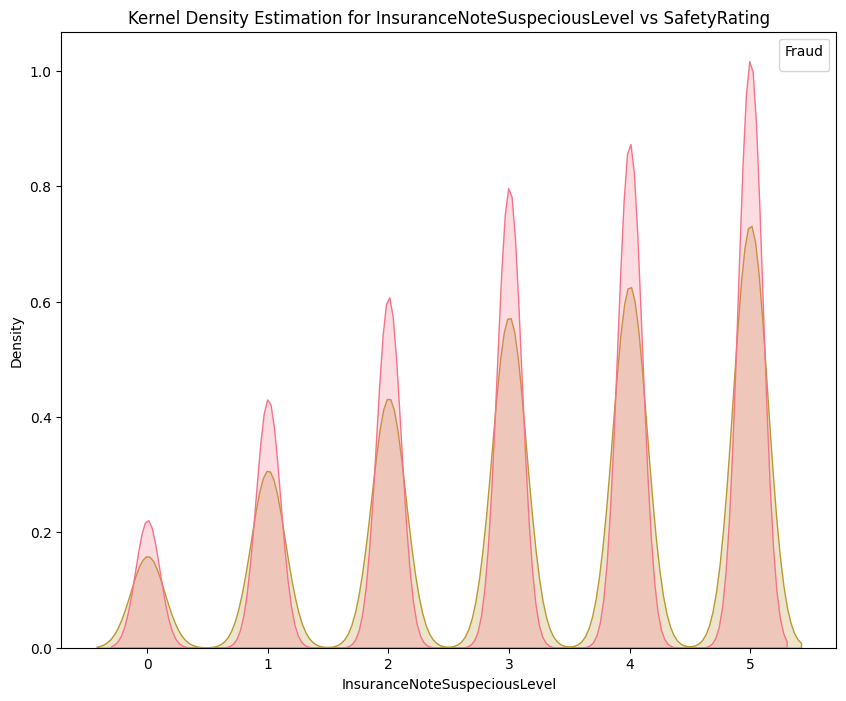

In [114]:
plt.rcParams['figure.figsize'] = (10, 8)

column_combination = ('InsuranceNoteSuspeciousLevel', 'SafetyRating')

sns.set_palette("husl")
sns.kdeplot(data=data, x=column_combination[0], hue='Fraud', fill=True, common_norm=False)

plt.legend(title='Fraud')
plt.xlabel(column_combination[0])
plt.ylabel('Density')
plt.title(f'Kernel Density Estimation for {column_combination[0]} vs {column_combination[1]}')
plt.show()

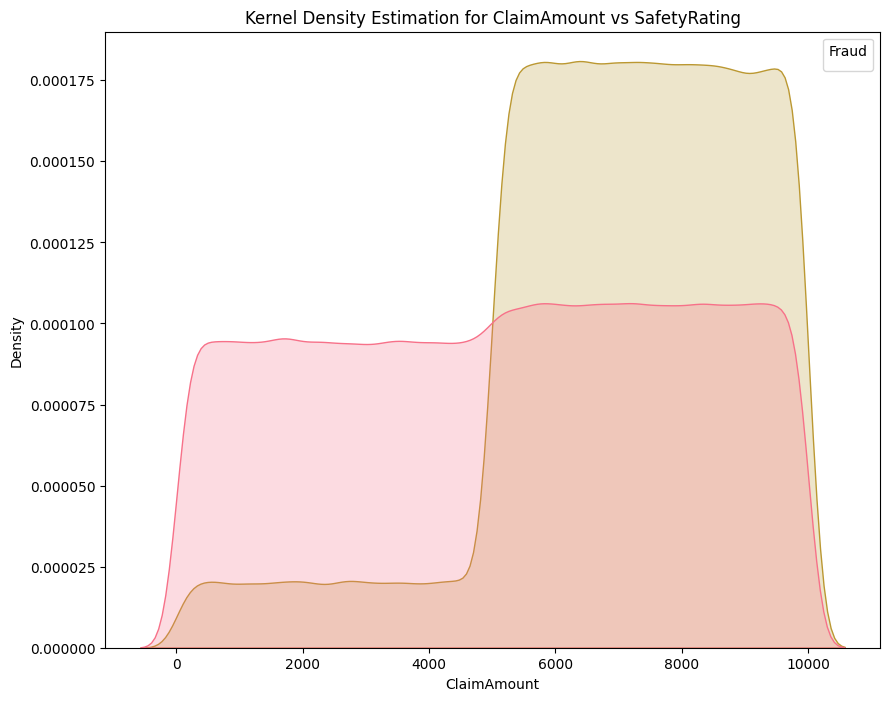

In [115]:
plt.rcParams['figure.figsize'] = (10, 8)

column_combination = ('ClaimAmount', 'SafetyRating')

sns.set_palette("husl")
sns.kdeplot(data=data, x=column_combination[0], hue='Fraud', fill=True, common_norm=False)

plt.legend(title='Fraud')
plt.xlabel(column_combination[0])
plt.ylabel('Density')
plt.title(f'Kernel Density Estimation for {column_combination[0]} vs {column_combination[1]}')
plt.show()

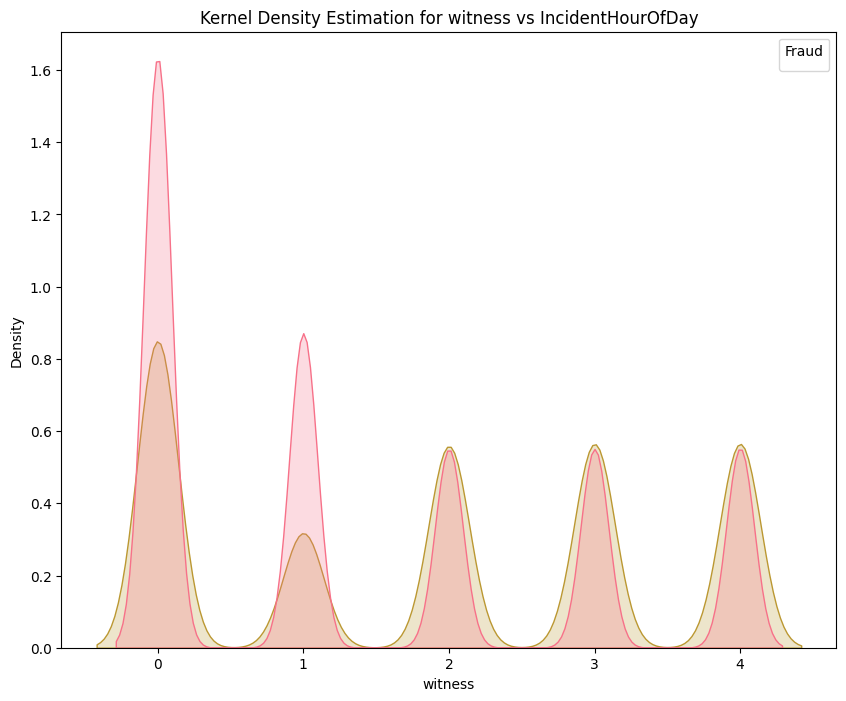

In [116]:
plt.rcParams['figure.figsize'] = (10, 8)

column_combination = ('witness', 'IncidentHourOfDay')

sns.set_palette("husl")
sns.kdeplot(data=data, x=column_combination[0], hue='Fraud', fill=True, common_norm=False)

plt.legend(title='Fraud')
plt.xlabel(column_combination[0])
plt.ylabel('Density')
plt.title(f'Kernel Density Estimation for {column_combination[0]} vs {column_combination[1]}')
plt.show()

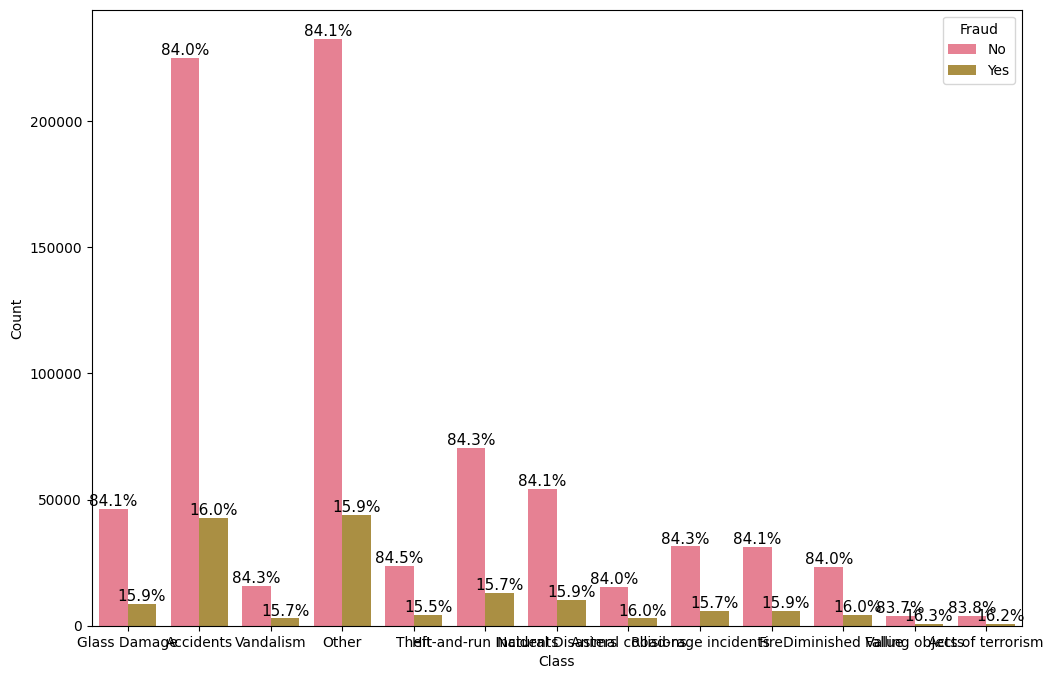

In [117]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="ClaimCause",hue="Fraud" ,data=data)
ax3.set(xlabel='Class', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

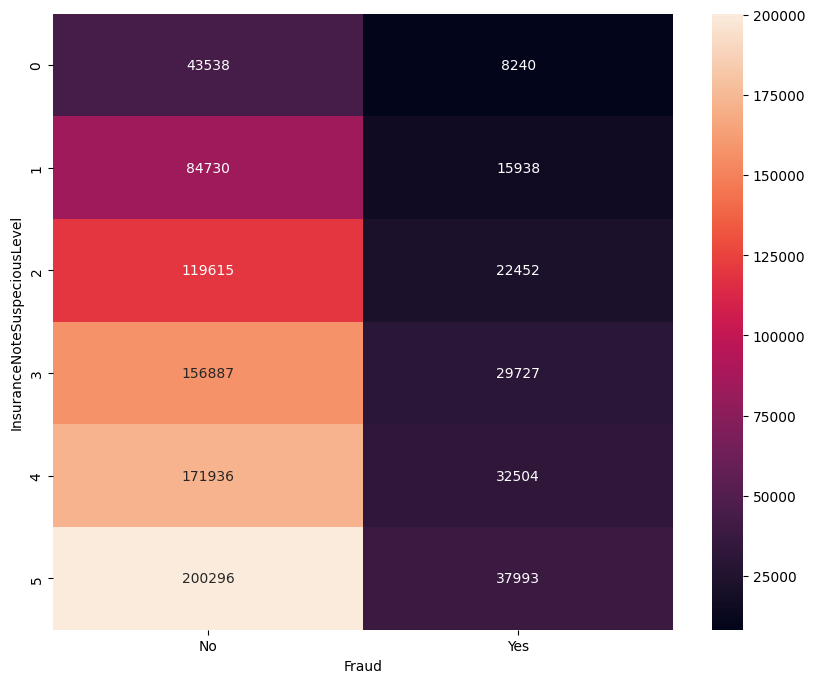

In [118]:
group = data.groupby(['InsuranceNoteSuspeciousLevel', 'Fraud'])
dataa = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(dataa, annot = True, fmt ="d")
plt.show()

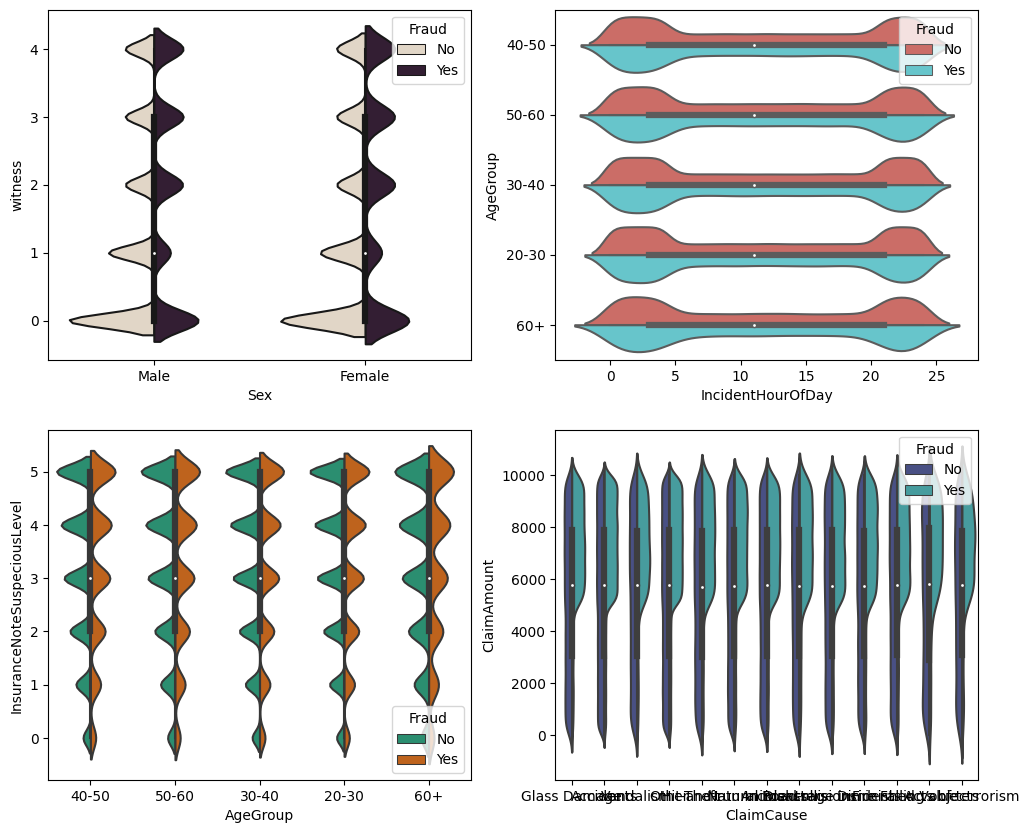

In [119]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

sns.violinplot(x='Sex',y='witness',ax=axes[0,0],data=data,palette="ch:.25",hue="Fraud",split=True)

sns.violinplot(x='IncidentHourOfDay',y='AgeGroup',ax=axes[0,1],data=data,hue="Fraud",split=True,palette="hls")

sns.violinplot(x='AgeGroup',y='InsuranceNoteSuspeciousLevel',ax=axes[1,0],data=data,hue="Fraud",split=True,palette="Dark2")

sns.violinplot(x='ClaimCause',y='ClaimAmount',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

sns.violinplot(x='InsuranceNoteSuspeciousLevel',y='Sex',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

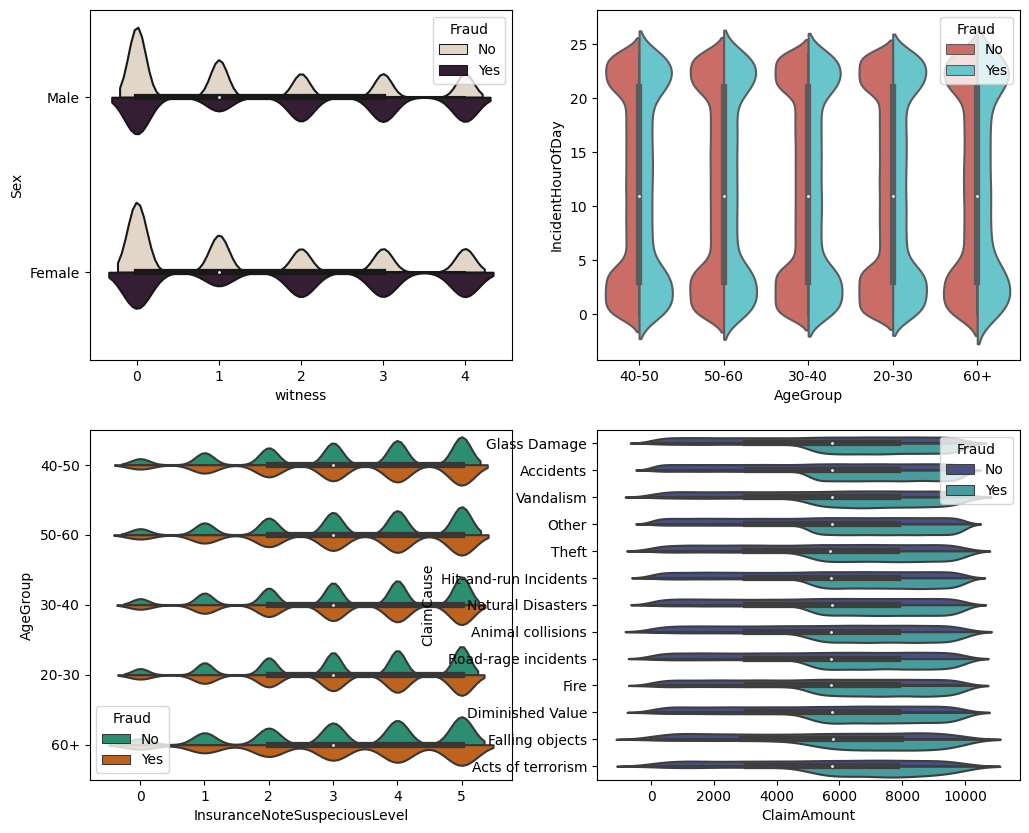

In [120]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

sns.violinplot(x='witness',y='Sex',ax=axes[0,0],data=data,palette="ch:.25",hue="Fraud",split=True)

sns.violinplot(x='AgeGroup',y='IncidentHourOfDay',ax=axes[0,1],data=data,hue="Fraud",split=True,palette="hls")

sns.violinplot(x='InsuranceNoteSuspeciousLevel',y='AgeGroup',ax=axes[1,0],data=data,hue="Fraud",split=True,palette="Dark2")

sns.violinplot(x='ClaimAmount',y='ClaimCause',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

sns.violinplot(x='Sex',y='InsuranceNoteSuspeciousLevel',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

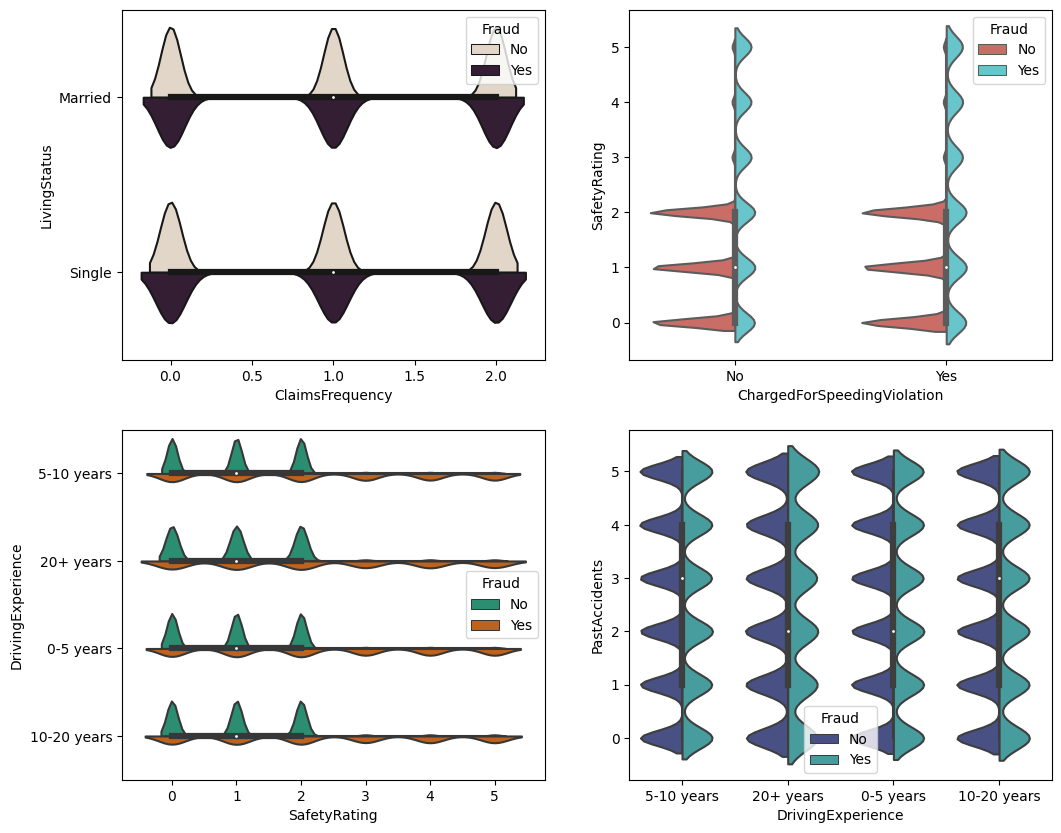

In [121]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

sns.violinplot(x='ClaimsFrequency',y='LivingStatus',ax=axes[0,0],data=data,palette="ch:.25",hue="Fraud",split=True)

sns.violinplot(x='ChargedForSpeedingViolation',y='SafetyRating',ax=axes[0,1],data=data,hue="Fraud",split=True,palette="hls")

sns.violinplot(x='SafetyRating',y='DrivingExperience',ax=axes[1,0],data=data,hue="Fraud",split=True,palette="Dark2")

sns.violinplot(x='DrivingExperience',y='PastAccidents',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

sns.violinplot(x='DrivingExperience',y='InsuranceNoteSuspeciousLevel',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

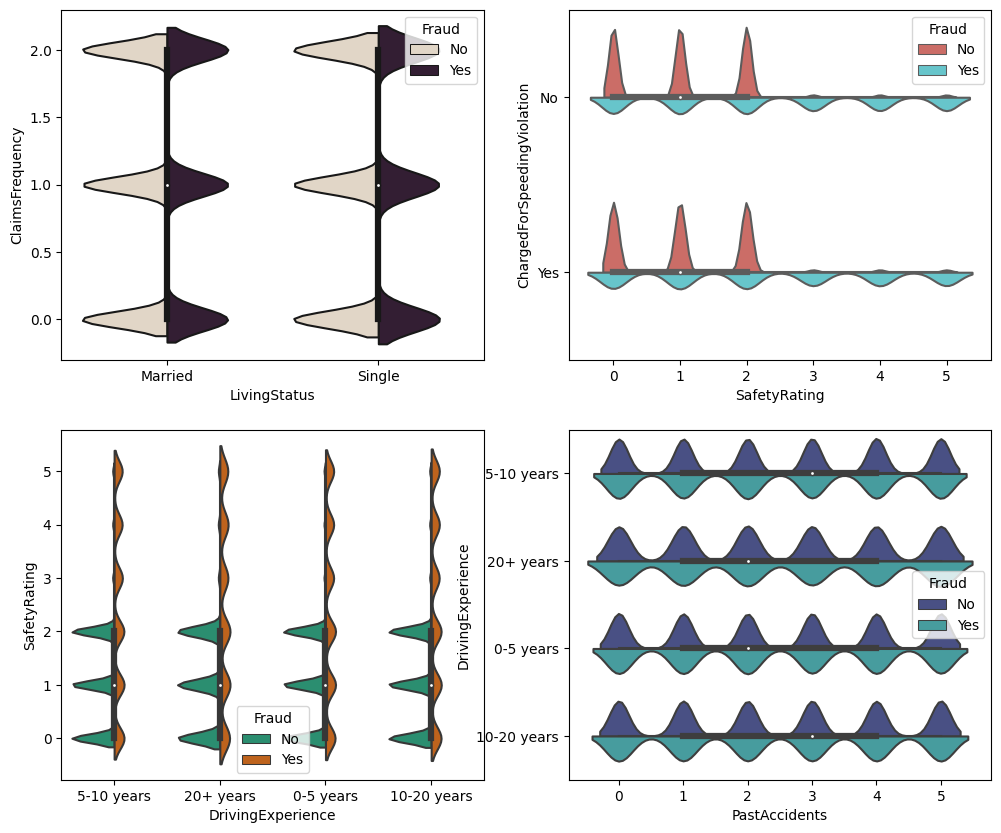

In [122]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

sns.violinplot(x='LivingStatus',y='ClaimsFrequency',ax=axes[0,0],data=data,palette="ch:.25",hue="Fraud",split=True)

sns.violinplot(x='SafetyRating',y='ChargedForSpeedingViolation',ax=axes[0,1],data=data,hue="Fraud",split=True,palette="hls")

sns.violinplot(x='DrivingExperience',y='SafetyRating',ax=axes[1,0],data=data,hue="Fraud",split=True,palette="Dark2")

sns.violinplot(x='PastAccidents',y='DrivingExperience',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

sns.violinplot(x='InsuranceNoteSuspeciousLevel',y='DrivingExperience',ax=axes[1,1],data=data,hue="Fraud",split=True,palette="mako")
plt.show()

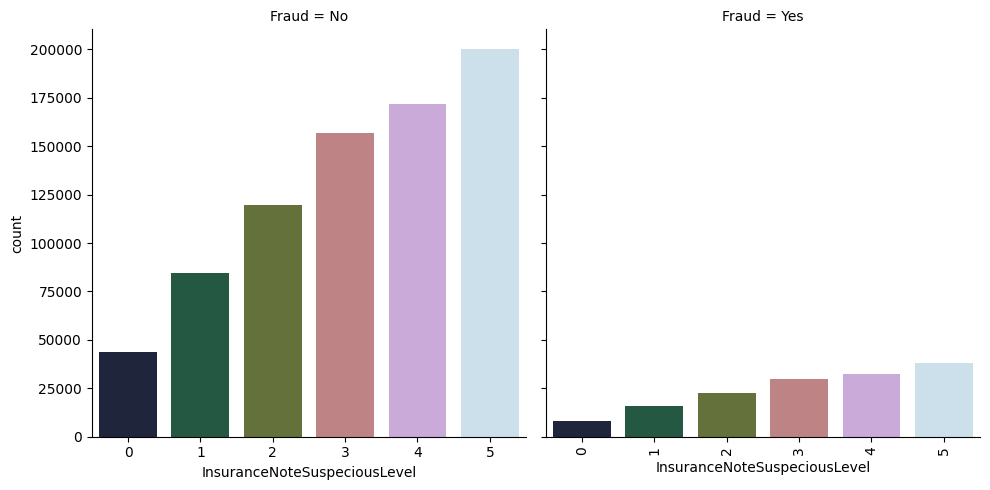

In [123]:
sns.catplot(x='InsuranceNoteSuspeciousLevel',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

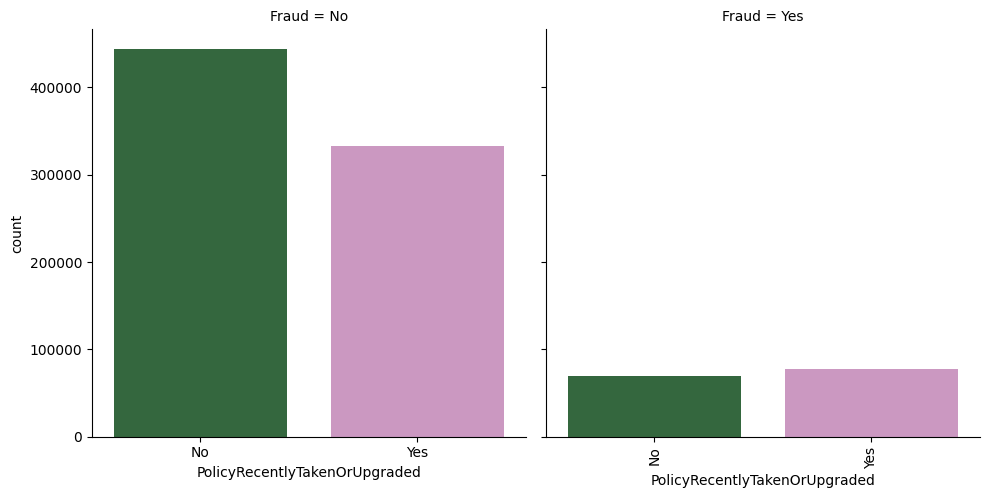

In [124]:
sns.catplot(x='PolicyRecentlyTakenOrUpgraded',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

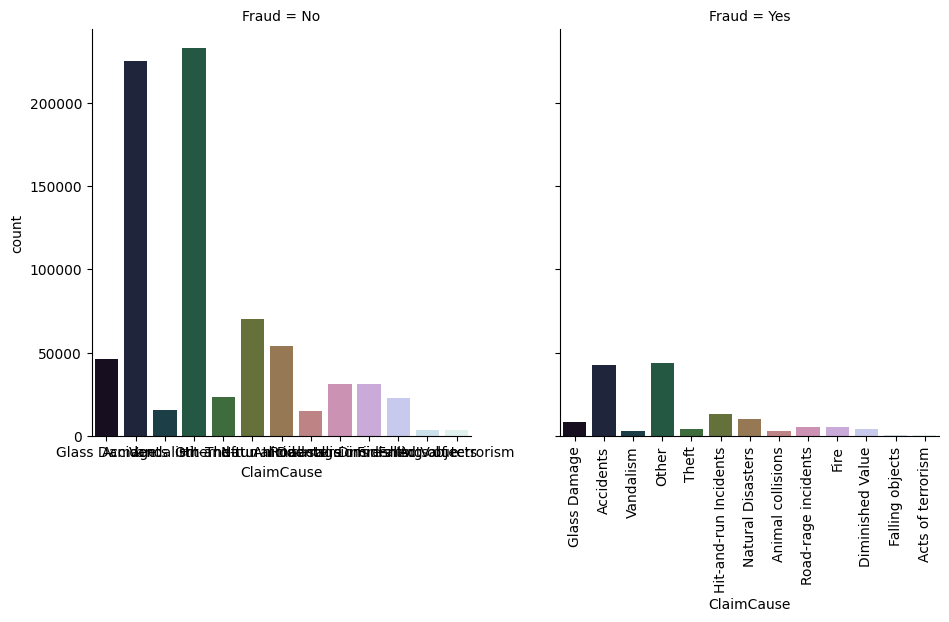

In [125]:
sns.catplot(x='ClaimCause',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

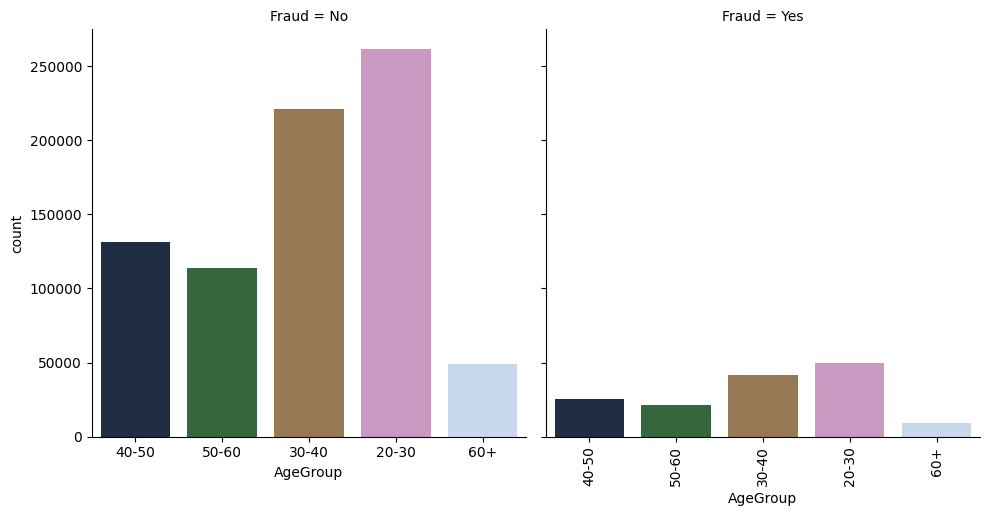

In [126]:
sns.catplot(x='AgeGroup',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

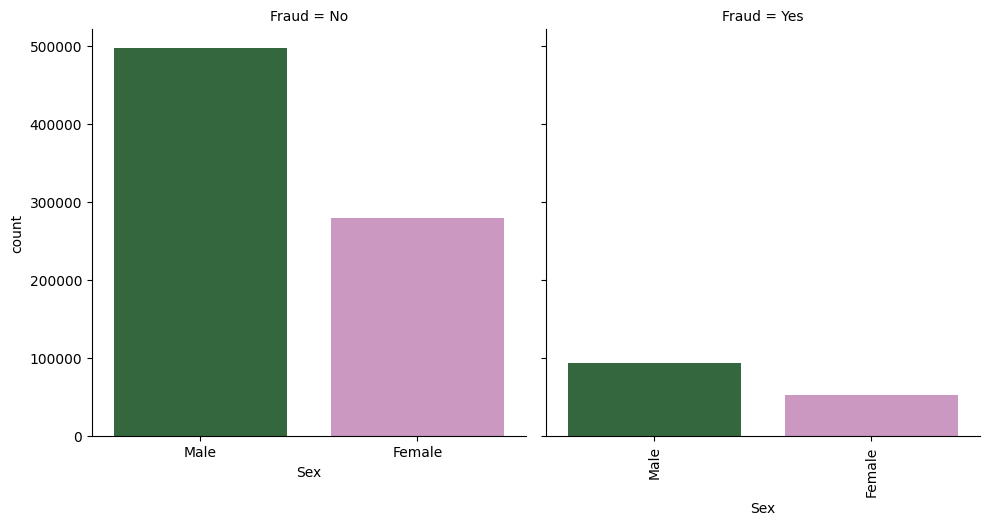

In [127]:
sns.catplot(x='Sex',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

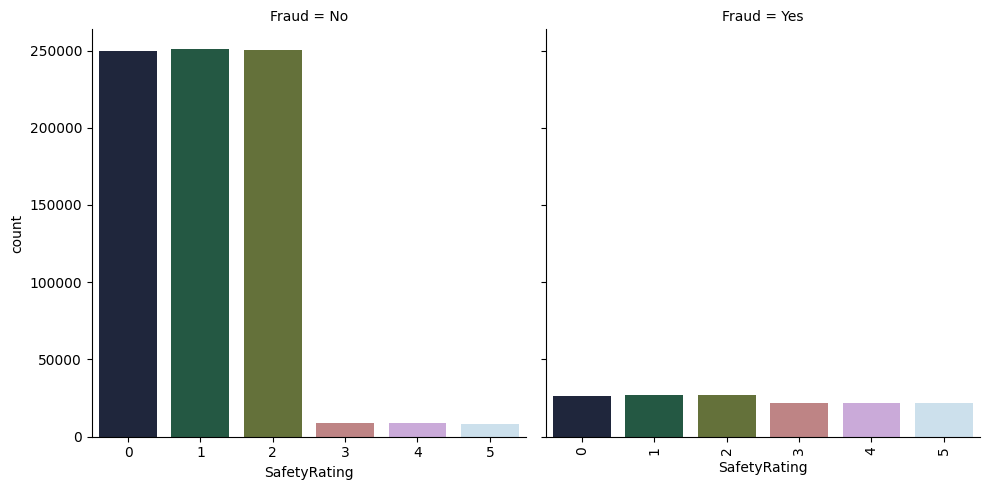

In [128]:
sns.catplot(x='SafetyRating',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

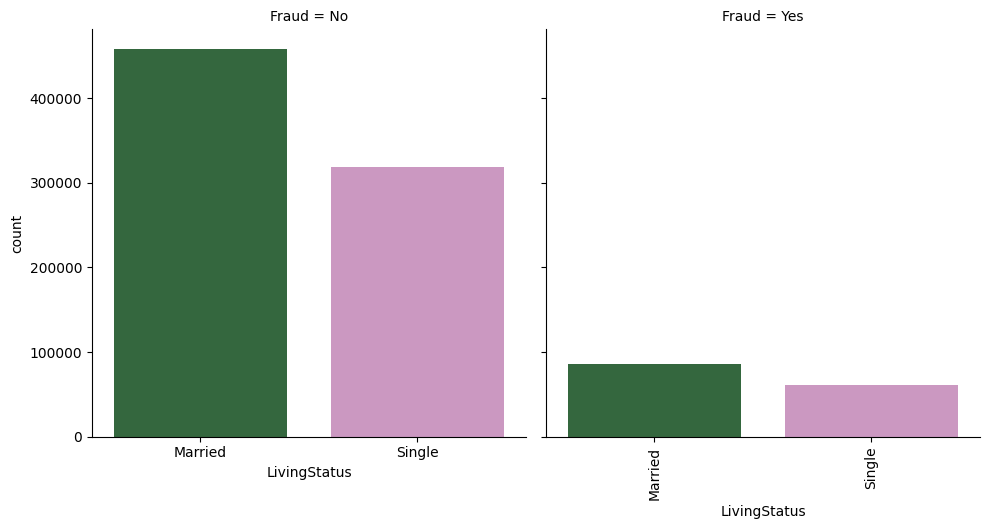

In [129]:
sns.catplot(x='LivingStatus',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

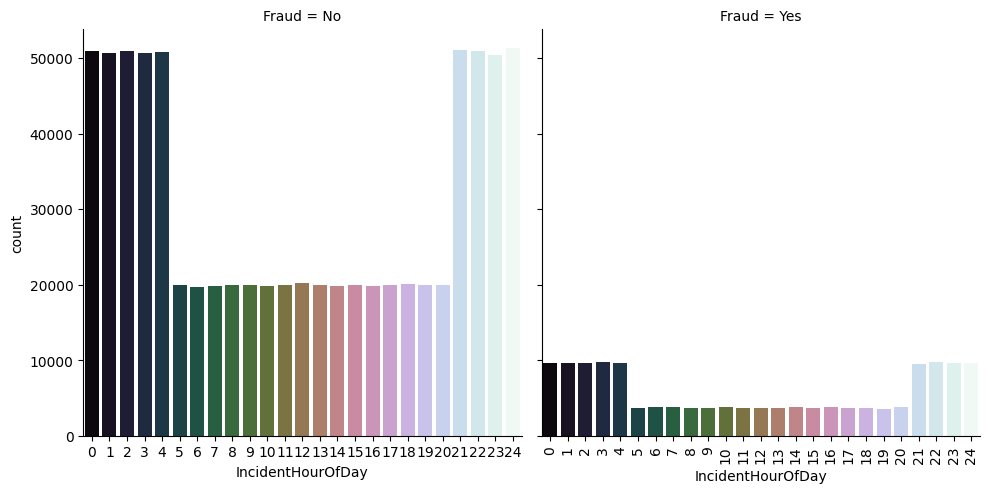

In [130]:
sns.catplot(x='IncidentHourOfDay',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

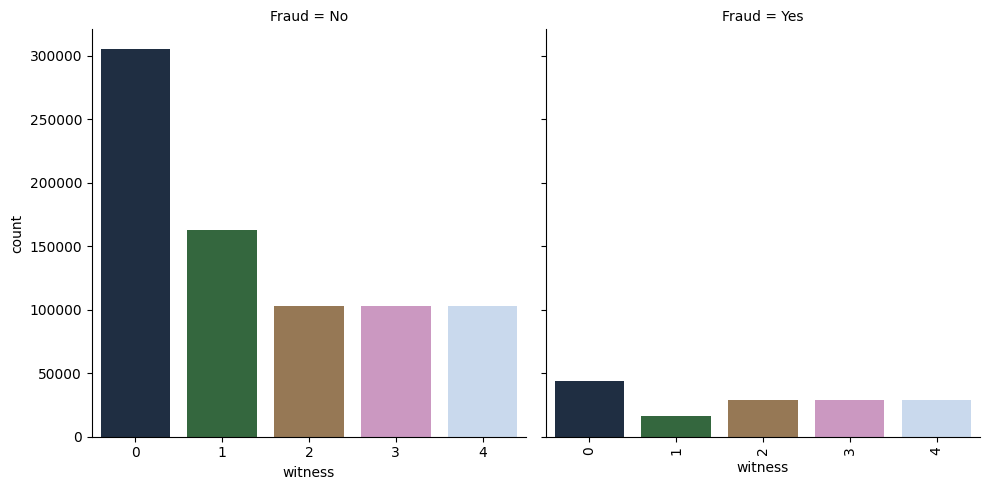

In [131]:
sns.catplot(x='witness',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

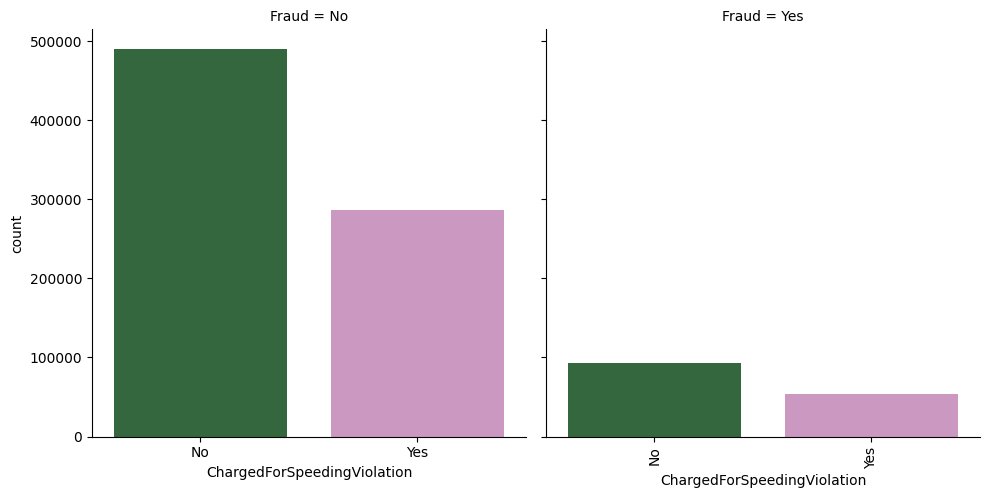

In [132]:
sns.catplot(x='ChargedForSpeedingViolation',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

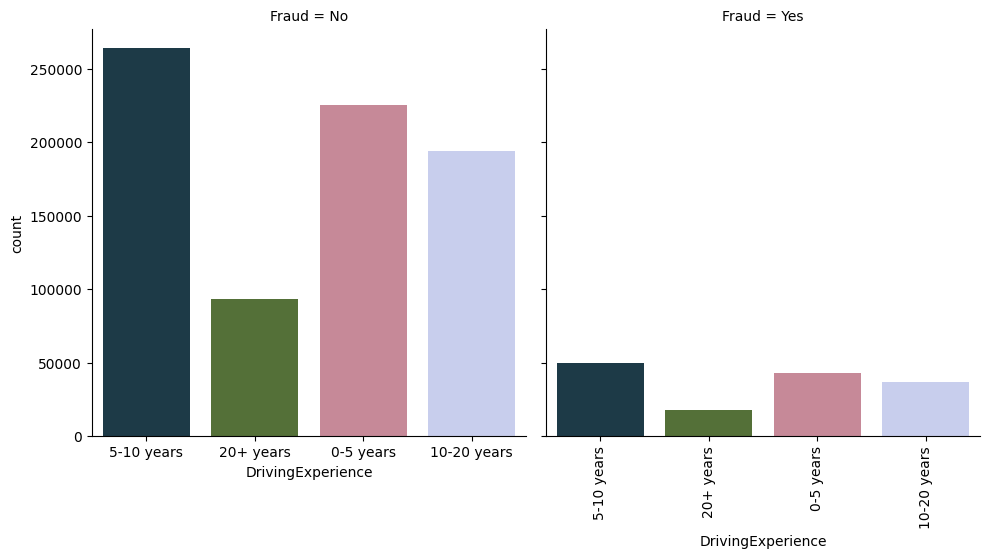

In [133]:
sns.catplot(x='DrivingExperience',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

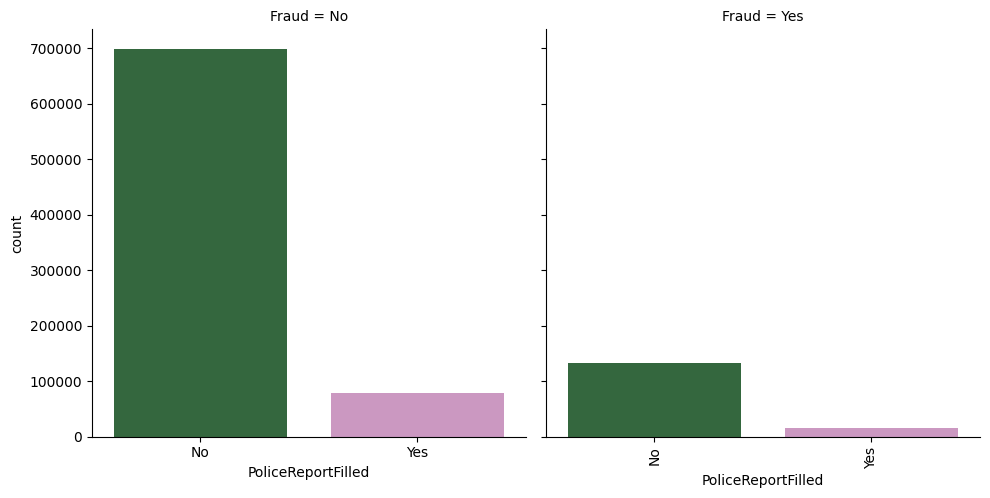

In [134]:
sns.catplot(x='PoliceReportFilled',kind='count',data=data,col='Fraud',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

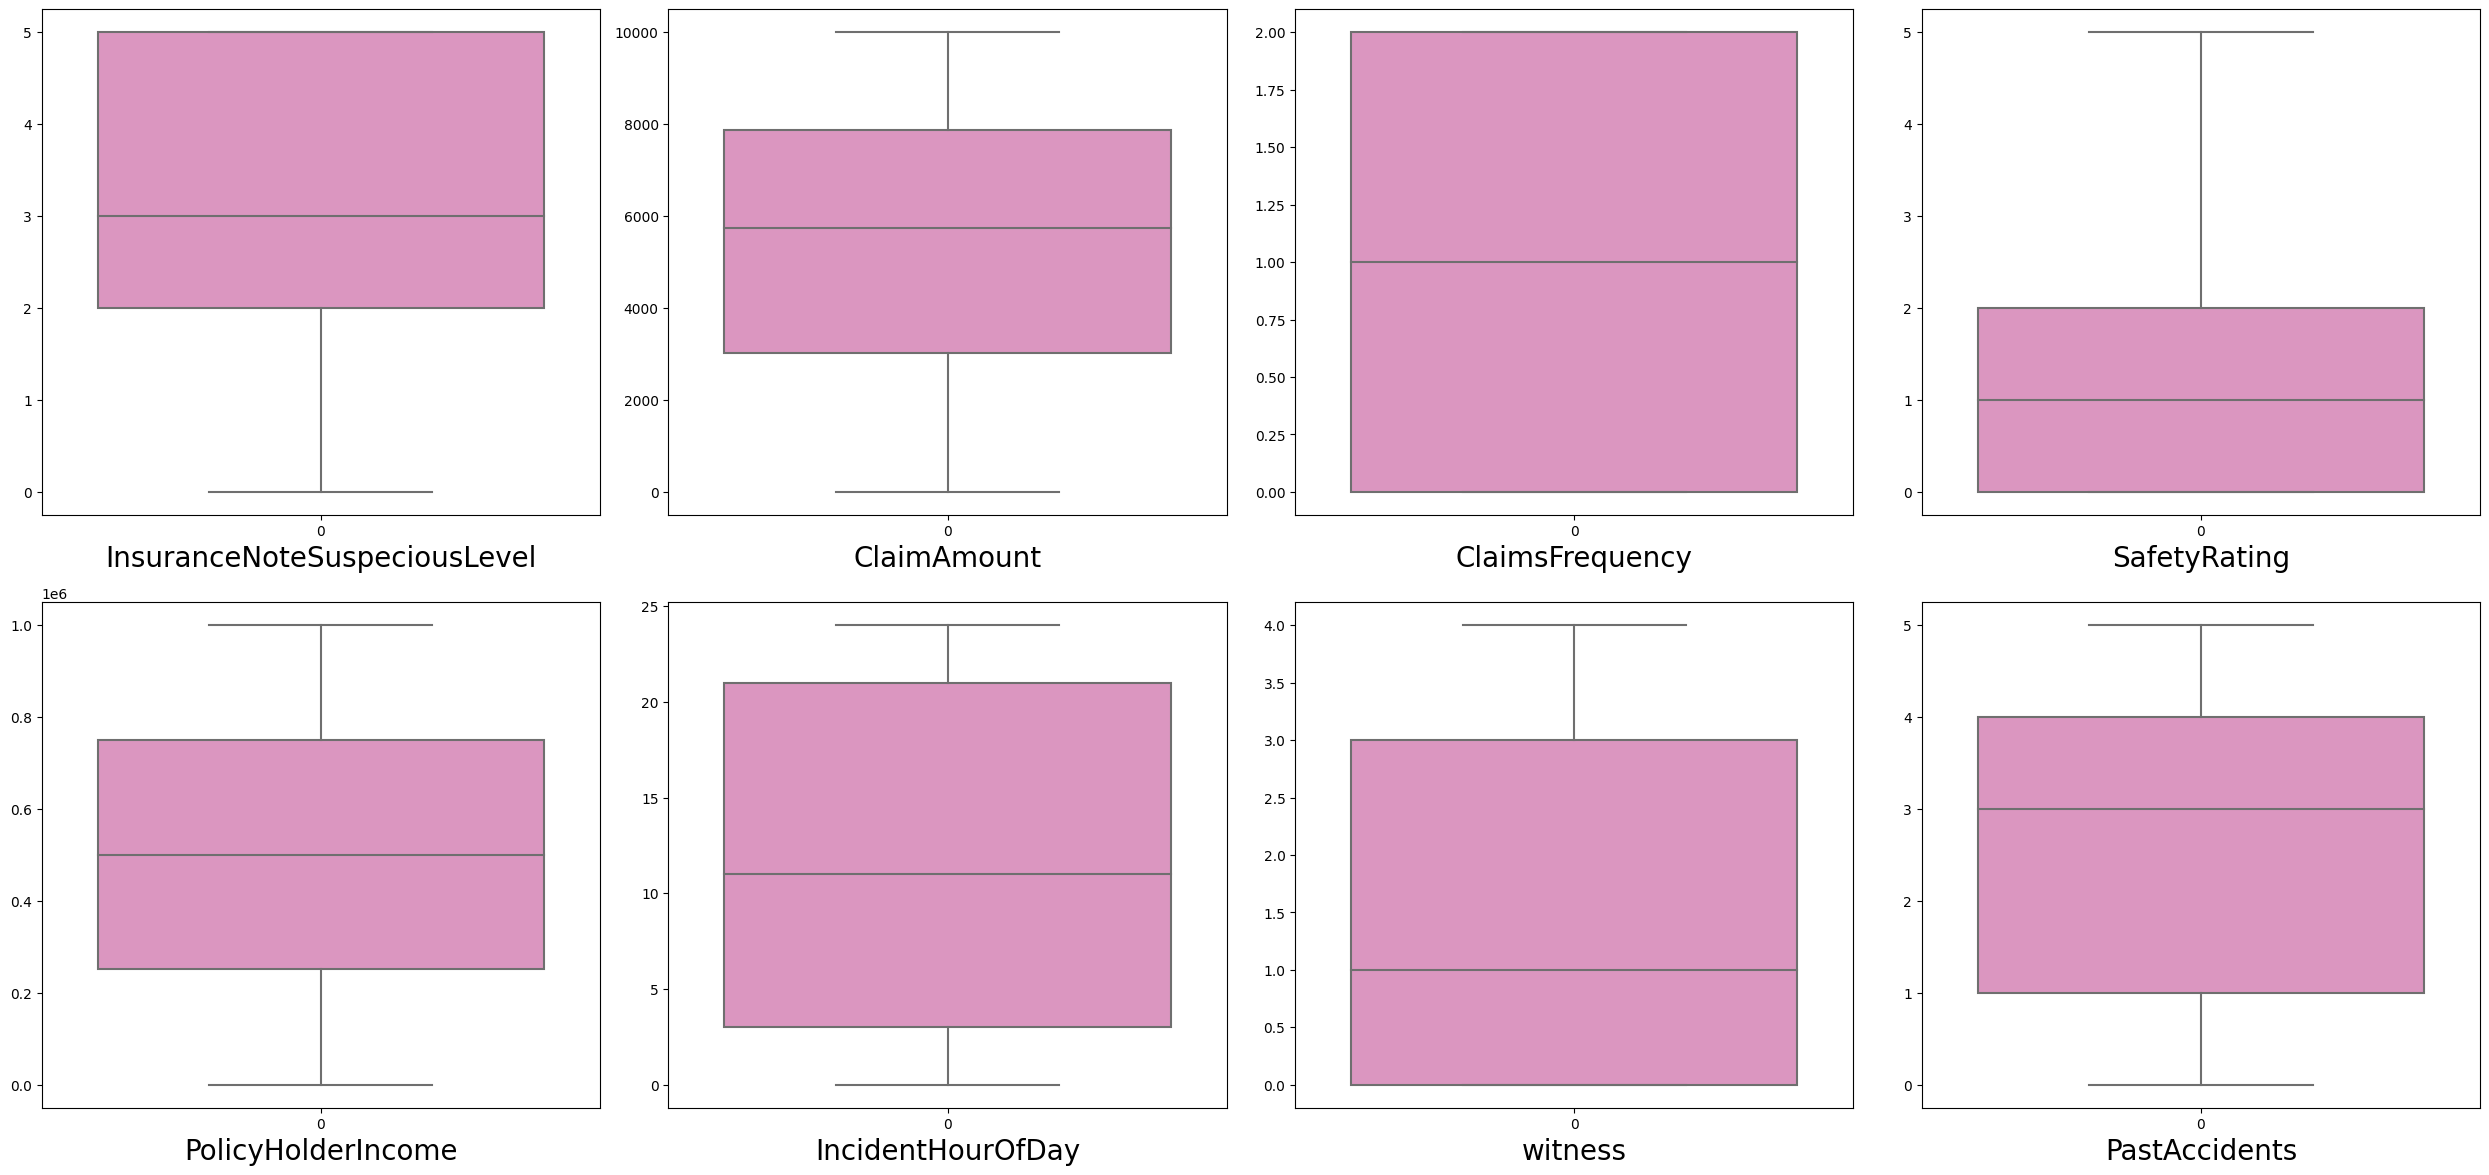

In [135]:
# Let's check the outliers by ploting box plot
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [136]:
from scipy.stats import zscore

features = data[['InsuranceNoteSuspeciousLevel','ClaimAmount','ClaimsFrequency','SafetyRating','PolicyHolderIncome','IncidentHourOfDay','witness','PastAccidents']]
z=np.abs(zscore(features))
z

InsuranceNoteSuspeciousLevel  ClaimAmount  ClaimsFrequency  \
0                           0.129870     1.476787         1.223201   
1                           0.528350     1.353668         1.224600   
2                           1.186569     0.876916         0.000699   
3                           1.186569     0.471473         1.223201   
4                           0.528350     0.301234         1.224600   
...                              ...          ...              ...   
923851                      2.104528     0.523973         1.223201   
923852                      0.129870     0.349609         0.000699   
923853                      0.528350     1.239520         0.000699   
923854                      1.186569     0.506073         0.000699   
923855                      0.129870     1.263102         1.223201   

        SafetyRating  PolicyHolderIncome  IncidentHourOfDay   witness  \
0           0.578485            0.515888           0.318273  1.719168   
1           0.246725            0.168663           0.628949  1.008820   
2           1.071936            1.111760           1.457768  1.037171   
3           1.071936            0.228035           1.028689  1.008820   
4           0.246725            1.240736           0.318273  0.355174   
...              ...                 ...                ...       ...   
923851      0.246725            0.819189           1.220963  0.355174   
923852      0.246725            1.171418           1.028689  1.008820   
923853      0.578485            0.272310           0.510547  1.008820   
923854      1.071936            1.032588           1.265494  0.355174   
923855      1.071936            0.525576           0.984157  1.008820   

        PastAccidents  
0            1.464073  
1            0.878921  
2            0.293769  
3            0.876535  
4            0.876535  
...               ...  
923851       0.878921  
923852       0.878921  
923853       1.461688  
923854       1.464073  
923855       0.291383  

[923856 rows x 8 columns]

In [137]:
average_z_score = np.max(z, axis=0)
print("Average z-score for each feature:")
print(average_z_score)

Average z-score for each feature:
InsuranceNoteSuspeciousLevel    2.104528
ClaimAmount                     1.904647
ClaimsFrequency                 1.224600
SafetyRating                    3.054117
PolicyHolderIncome              1.734971
IncidentHourOfDay               1.457768
witness                         1.719168
PastAccidents                   1.464073
dtype: float64


In [138]:
very_new_data = data[(z<3).all(axis=1)]
very_new_data

Fraud  InsuranceNoteSuspeciousLevel PolicyHolderOccupation  \
0         No                             3                 Doctor   
1         No                             4                Teacher   
2         No                             5            Electrician   
3         No                             5            Salesperson   
4        Yes                             4                 Doctor   
...      ...                           ...                    ...   
923851    No                             0               Engineer   
923852    No                             3               Engineer   
923853    No                             4               Engineer   
923854    No                             5               Musician   
923855    No                             3            Electrician   

       PolicyRecentlyTakenOrUpgraded         ClaimCause AgeGroup  ClaimAmount  \
0                                 No       Glass Damage    40-50      1229.68   
1                                Yes          Accidents    50-60      9298.26   
2                                 No          Vandalism    30-40      2939.69   
3                                 No       Glass Damage    20-30      6783.45   
4                                 No          Accidents    30-40      6298.16   
...                              ...                ...      ...          ...   
923851                            No  Acts of terrorism    50-60      3945.80   
923852                           Yes  Natural Disasters    20-30      6436.06   
923853                            No              Other    20-30      1906.04   
923854                            No          Vandalism    50-60      6882.08   
923855                           Yes       Glass Damage    30-40      9040.09   

           Sex  ClaimsFrequency  SafetyRating  PolicyHolderIncome  \
0         Male                0             2              352314   
1       Female                2             1              452377   
2         Male                1             0              821368   
3       Female                0             0              566697   
4         Male                2             1              858536   
...        ...              ...           ...                 ...   
923851    Male                0             1              264909   
923852    Male                1             1              163404   
923853    Male                1             2              422508   
923854  Female                1             0              203412   
923855  Female                0             0              349522   

       LivingStatus  IncidentHourOfDay  witness ChargedForSpeedingViolation  \
0           Married                  9        4                          No   
1            Single                 17        0                          No   
2            Single                 24        3                         Yes   
3           Married                  3        0                          No   
4            Single                  9        2                         Yes   
...             ...                ...      ...                         ...   
923851       Single                 22        2                         Yes   
923852      Married                  3        0                          No   
923853       Single                 16        0                         Yes   
923854       Single                  1        2                         Yes   
923855      Married                 20        0                         Yes   

       DrivingExperience  PastAccidents PoliceReportFilled  
0             5-10 years              0                 No  
1              20+ years              1                 No  
2             5-10 years              2                 No  
3             5-10 years              4                 No  
4             5-10 years              4                 No  
...                  ...            ...                ...  


In [139]:
loss_percent=(923856-893445)/923856*100
print(loss_percent,'%')

3.2917467657297244 %


In [140]:
# Checking the skewness
very_new_data.skew().sort_values()

<ipython-input-140-821cee60fe89>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  very_new_data.skew().sort_values()


InsuranceNoteSuspeciousLevel   -0.464385
ClaimAmount                    -0.200596
PolicyHolderIncome             -0.001842
PastAccidents                  -0.001587
ClaimsFrequency                 0.001572
IncidentHourOfDay               0.078238
witness                         0.497726
SafetyRating                    0.626064
dtype: float64

<ipython-input-141-f4a473677ef8>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['PolicyHolderOccupation', 'Fraud']).mean()['PolicyHolderIncome']


<Axes: xlabel='PolicyHolderOccupation'>

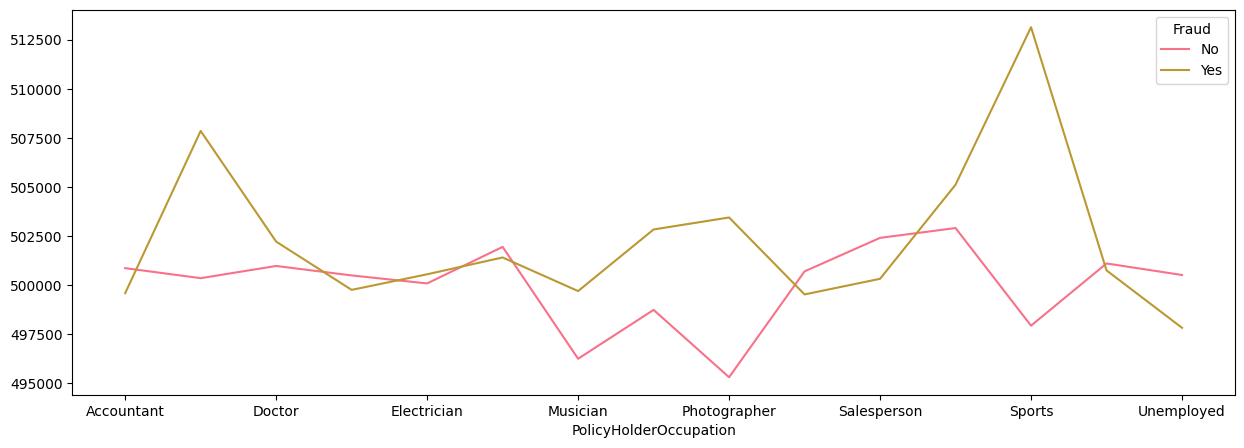

In [141]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['PolicyHolderOccupation', 'Fraud']).mean()['PolicyHolderIncome']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-142-132a25df6bc9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['PolicyHolderOccupation', 'AgeGroup']).mean()['PolicyHolderIncome']


<Axes: xlabel='PolicyHolderOccupation'>

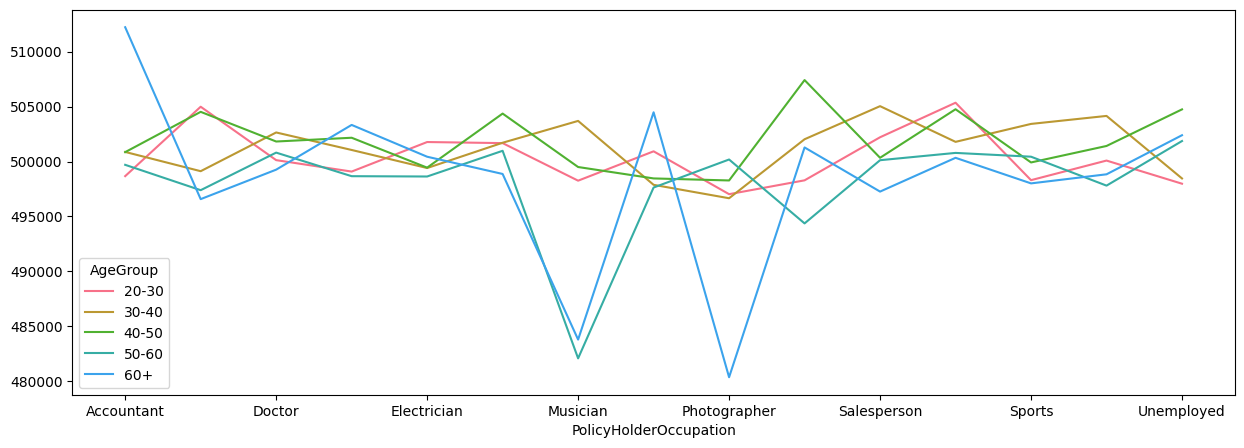

In [142]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['PolicyHolderOccupation', 'AgeGroup']).mean()['PolicyHolderIncome']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-143-9dcc82baddb7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['AgeGroup', 'Fraud']).mean()['PolicyHolderIncome']


<Axes: xlabel='AgeGroup'>

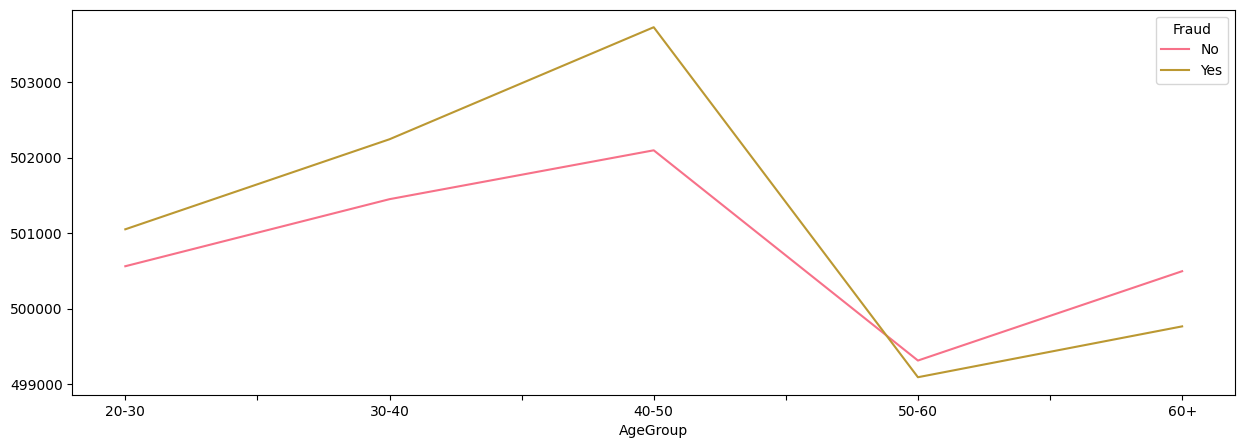

In [143]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['AgeGroup', 'Fraud']).mean()['PolicyHolderIncome']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-144-c5d2e6388fdf>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['IncidentHourOfDay', 'PoliceReportFilled']).mean()['InsuranceNoteSuspeciousLevel']


<Axes: xlabel='IncidentHourOfDay'>

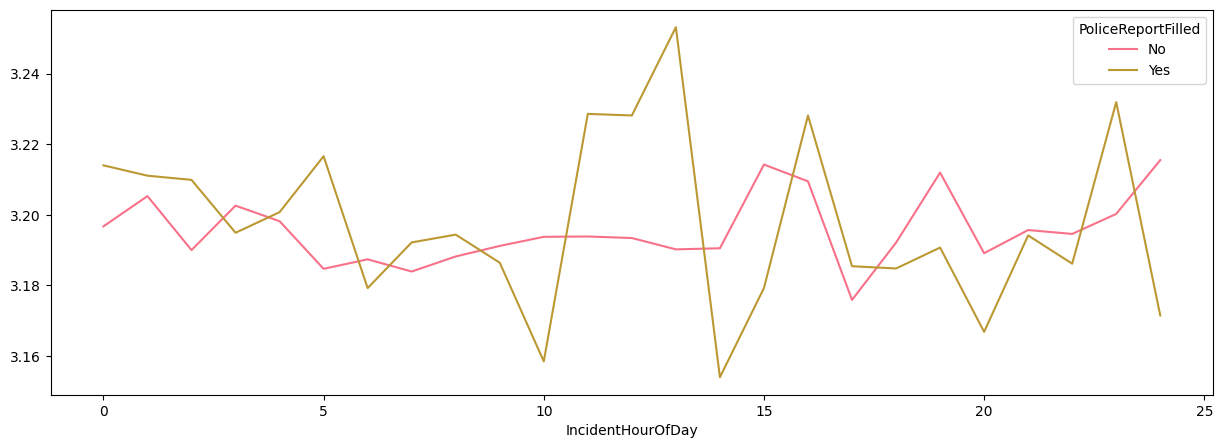

In [144]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['IncidentHourOfDay', 'PoliceReportFilled']).mean()['InsuranceNoteSuspeciousLevel']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-145-979178c6cd13>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['DrivingExperience', 'InsuranceNoteSuspeciousLevel']).mean()['ClaimAmount']


<Axes: xlabel='DrivingExperience'>

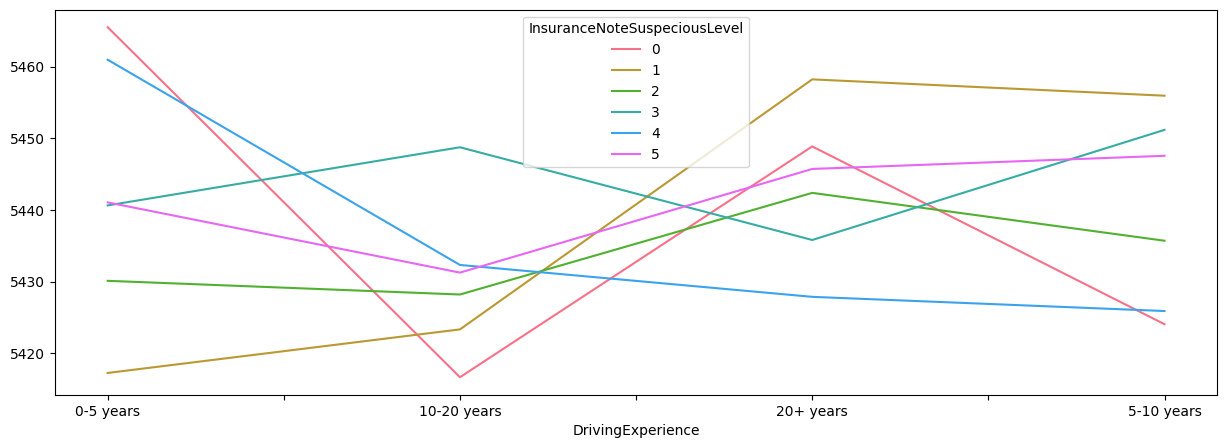

In [145]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['DrivingExperience', 'InsuranceNoteSuspeciousLevel']).mean()['ClaimAmount']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-146-d85a4160d5c8>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['ClaimCause', 'Sex']).mean()['SafetyRating']


<Axes: xlabel='ClaimCause'>

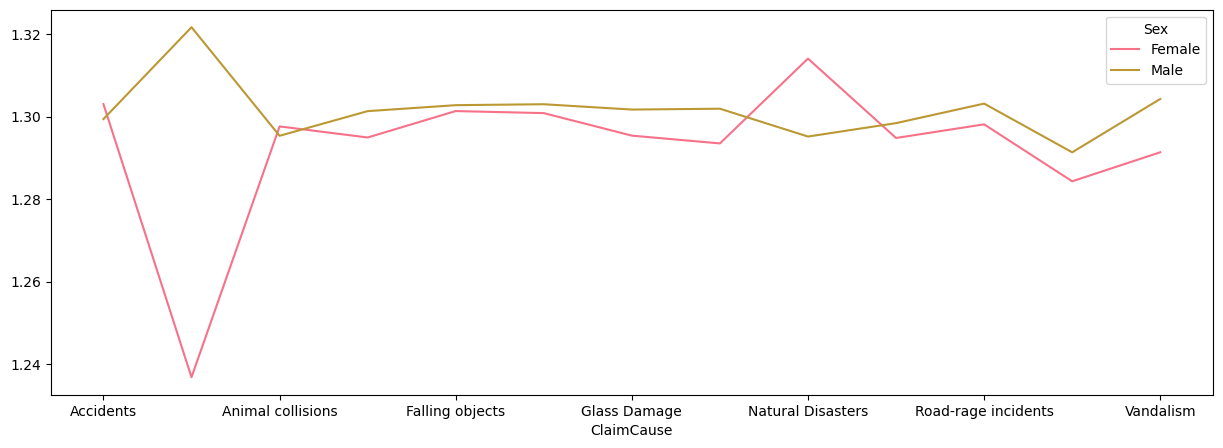

In [146]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['ClaimCause', 'Sex']).mean()['SafetyRating']
df_avg_prem.unstack().plot(ax=ax)

<ipython-input-147-0d2c657f9515>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['InsuranceNoteSuspeciousLevel', 'AgeGroup']).mean()['SafetyRating']


<Axes: xlabel='InsuranceNoteSuspeciousLevel'>

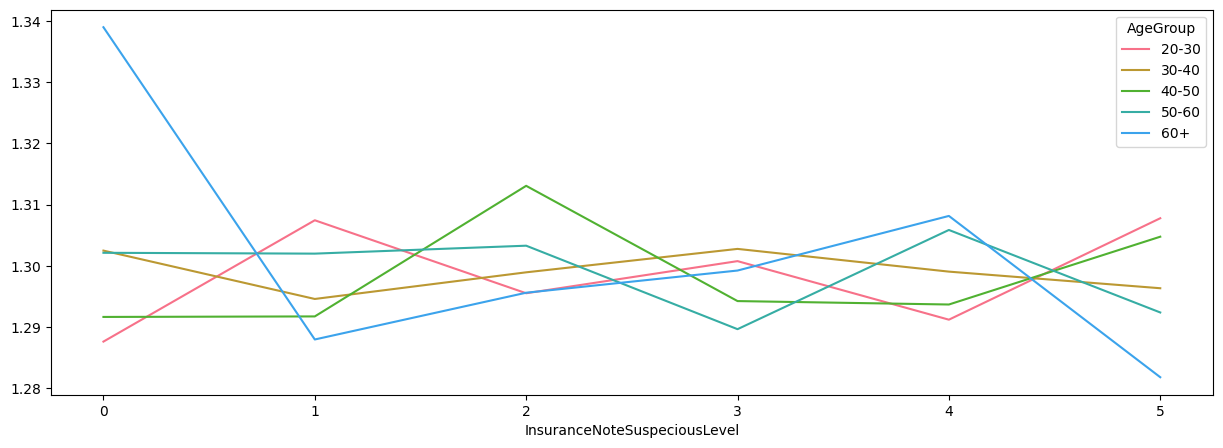

In [147]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,5))
df_avg_prem = data.groupby(['InsuranceNoteSuspeciousLevel', 'AgeGroup']).mean()['SafetyRating']
df_avg_prem.unstack().plot(ax=ax)

In [148]:
import scipy.stats as stats
def diagnostic_plots(data, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

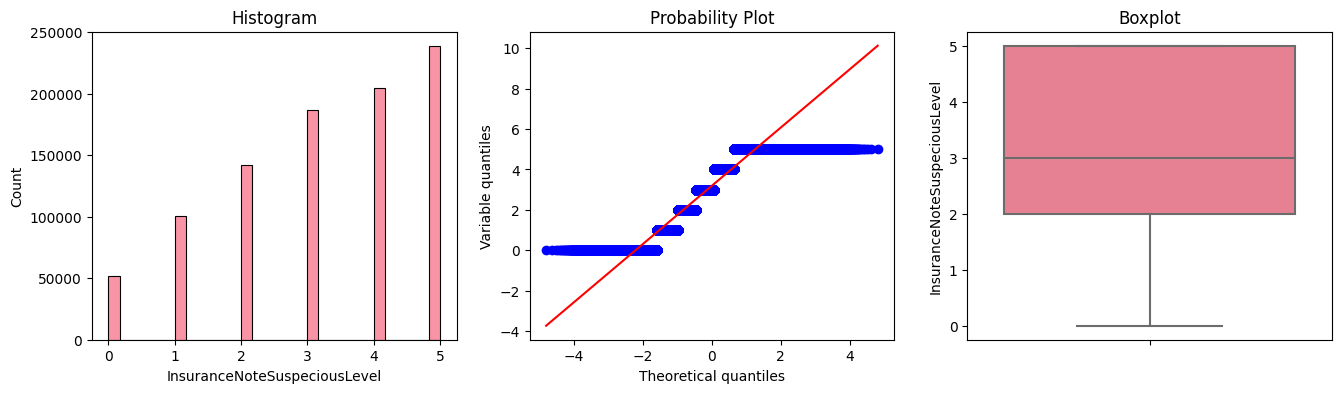

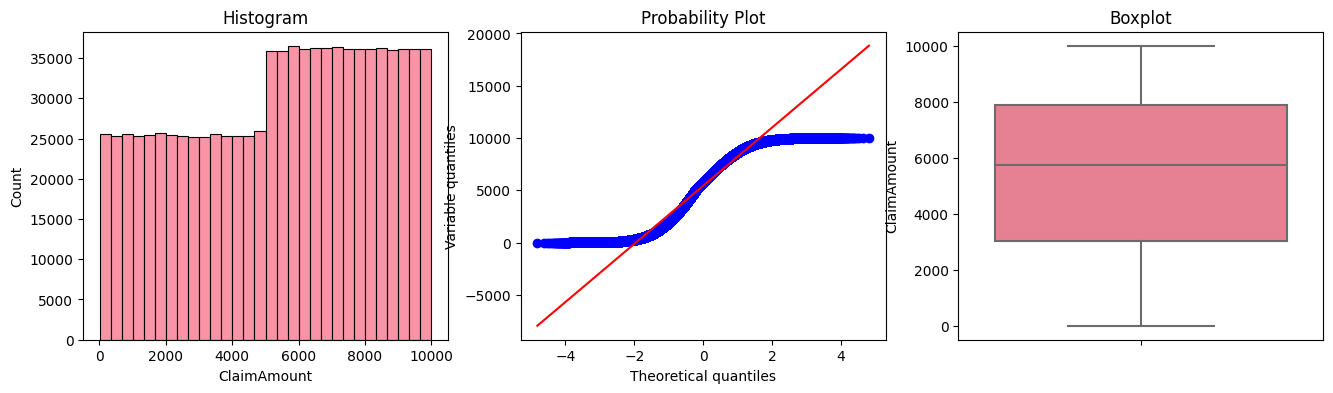

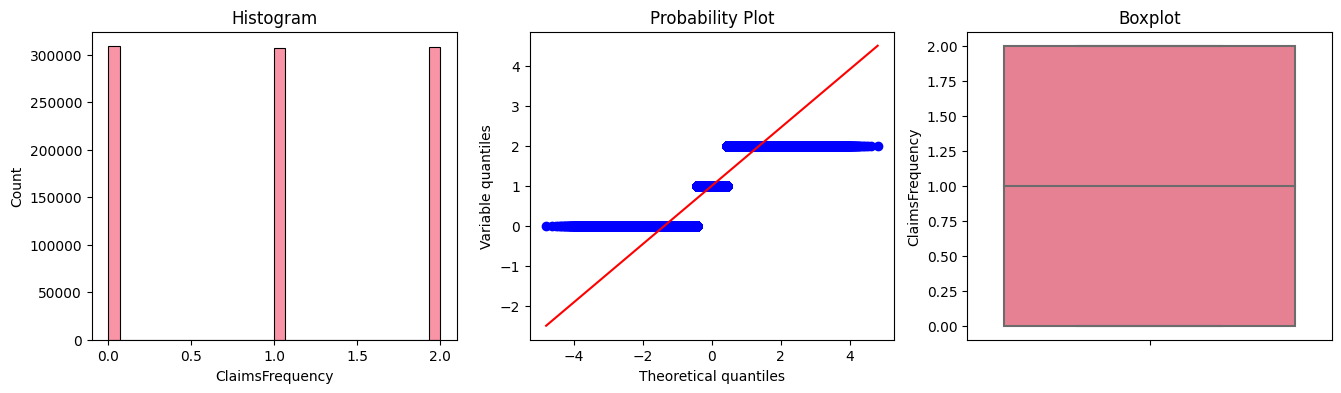

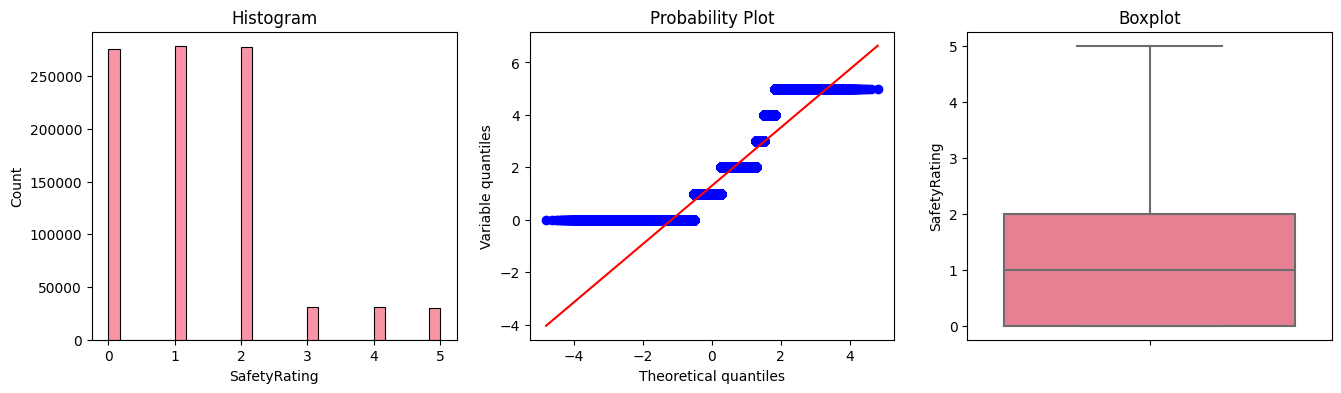

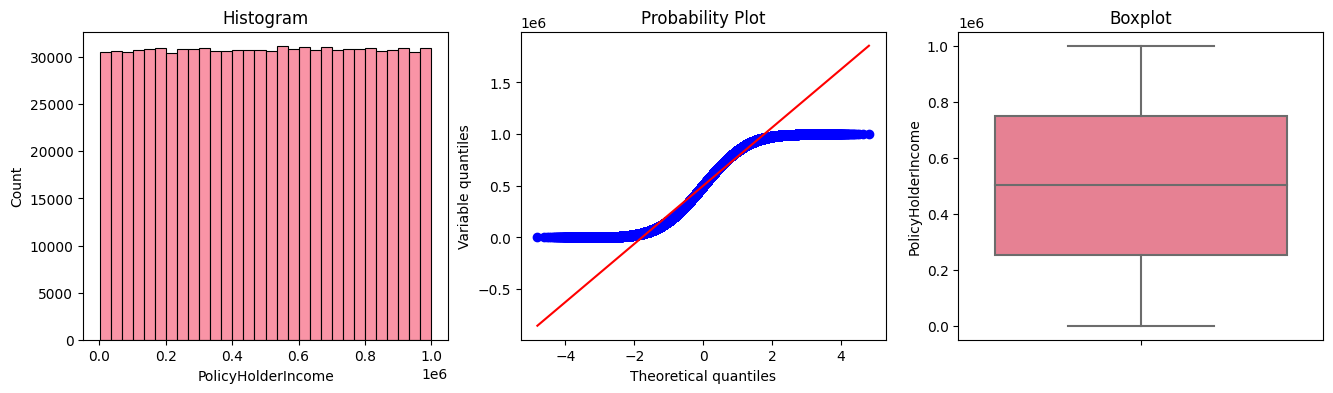

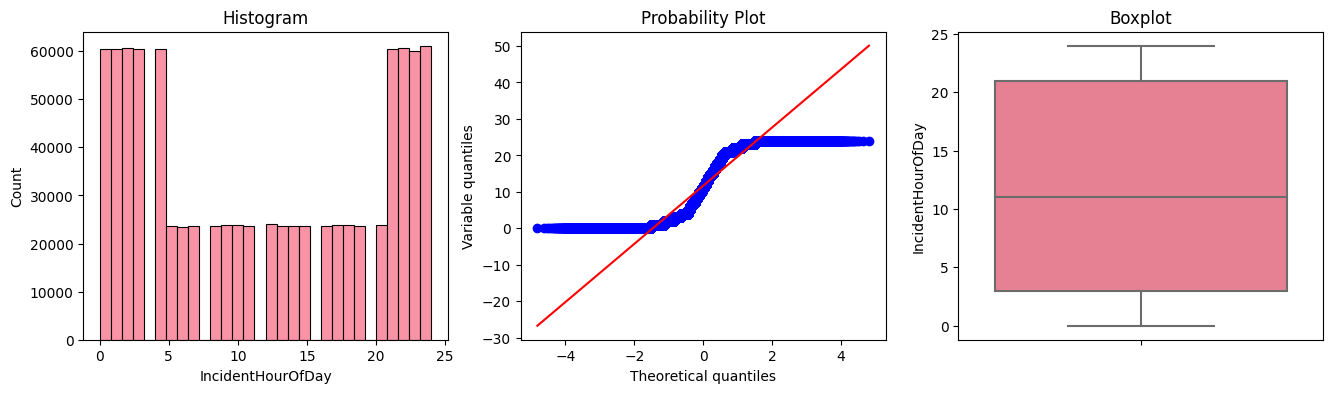

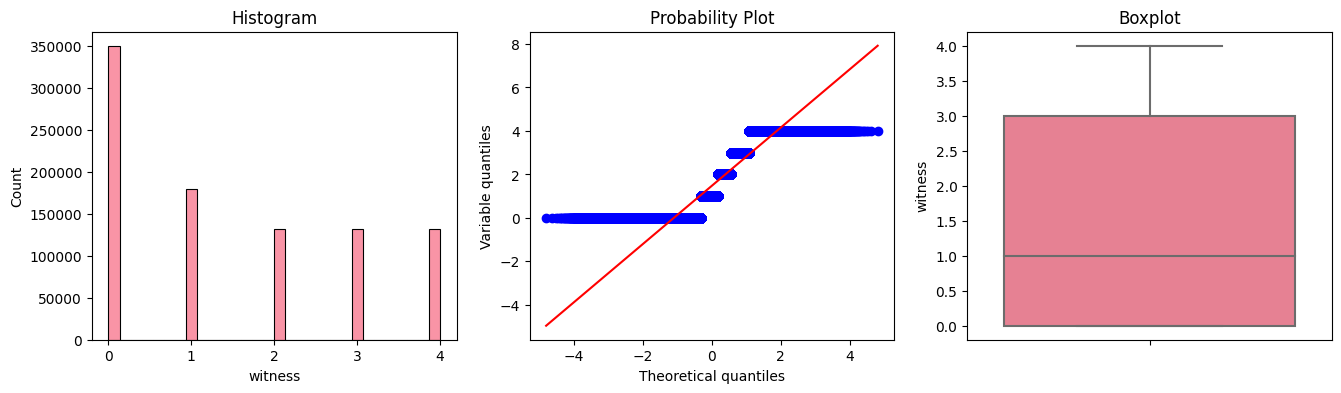

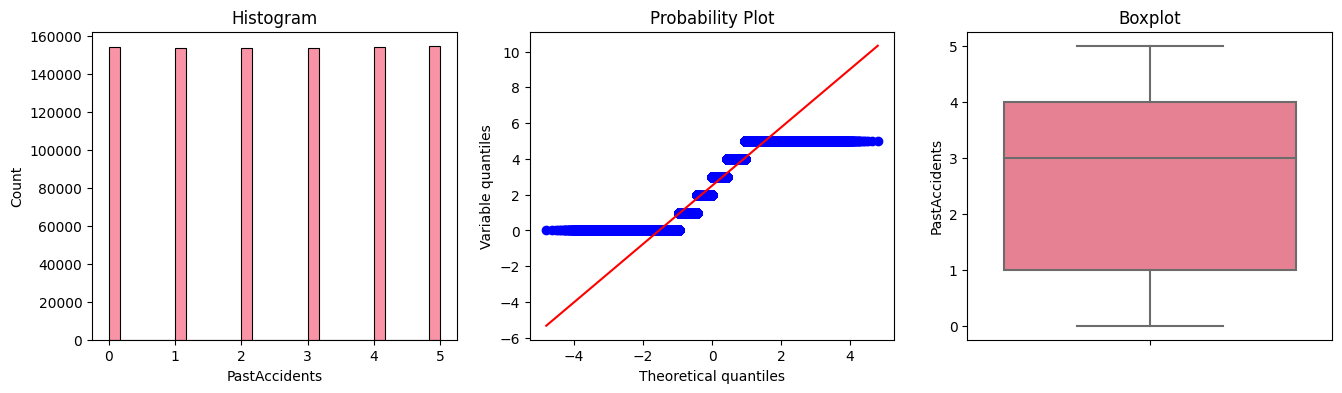

In [149]:
for feature in numerical_columns :

    diagnostic_plots(data, feature)